## Trabajo de Fin de M√°ster: Predicci√≥n Inteligente de Precios en Airbnb Madrid
### Autora: Katherine L√≥pez Ram√≠rez
### Fecha de entrega: [12/09/2025]

# Cargar datos y Exploraci√≥n

Cargamos las dos fuentes de Inside Airbnb: 
https://insideairbnb.com/get-the-data.html
- listings.csv.gz: metadatos del anuncio (caracter√≠sticas del alojamiento y del host).
- calendar.csv.gz: disponibilidad y precio por d√≠a.

In [237]:
# Librer√≠as principales
import pandas as pd         
import numpy as np            

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
# Carga de archivos
listings = pd.read_csv("../datos_brutos/listings.csv.gz", low_memory=False)
calendar = pd.read_csv("../datos_brutos/calendar.csv.gz", low_memory=False)

# Primeras filas
print("LISTADOS:")
display(listings.head())

print("CALENDARIO:")
display(calendar.head())

LISTADOS:


id                         listing_url       scrape_id last_scraped  \
0  21853  https://www.airbnb.com/rooms/21853  20250305023340   2025-03-11   
1  30320  https://www.airbnb.com/rooms/30320  20250305023340   2025-03-10   
2  30959  https://www.airbnb.com/rooms/30959  20250305023340   2025-03-10   
3  40916  https://www.airbnb.com/rooms/40916  20250305023340   2025-03-10   
4  62423  https://www.airbnb.com/rooms/62423  20250305023340   2025-03-12   

            source                                          name  \
0      city scrape                          Bright and airy room   
1  previous scrape                   Great Vacational Apartments   
2  previous scrape               Beautiful loft in Madrid Center   
3  previous scrape               Holiday Apartment Madrid Center   
4      city scrape  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   

                                         description  \
0  We have a quiet and sunny room with a good vie...   
1                                                NaN   
2  Beautiful Loft 60m2 size just in the historica...   
3                                                NaN   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   

                               neighborhood_overview  \
0  We live in a leafy neighbourhood with plenty o...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/68483181/87bc...    83531  ...   
1  https://a0.muscache.com/pictures/336868/f67409...   130907  ...   
2  https://a0.muscache.com/pictures/78173471/835e...   132883  ...   
3  https://a0.muscache.com/pictures/336736/c3b486...   130907  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   303845  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.21                4.67   
1                        4.78                   4.90                4.69   
2                        4.63                   4.88                4.25   
3                        4.79                   4.88                4.55   
4                        4.85                   4.97                4.58   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              3   
2     NaN                f                              1   
3     NaN                f                              3   
4     NaN                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           3   
2                                           1   
3                                           3   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.96  
2                                           0              0.07  
3                                           0              0.28  
4                                           0              2.73  

[5 rows x 79 columns]

CALENDARIO:


listing_id        date available   price adjusted_price  minimum_nights  \
0       21853  2025-03-11         f  $28.00            NaN             4.0   
1       21853  2025-03-12         f  $28.00            NaN             4.0   
2       21853  2025-03-13         f  $28.00            NaN             4.0   
3       21853  2025-03-14         f  $28.00            NaN             4.0   
4       21853  2025-03-15         f  $28.00            NaN             4.0   

   maximum_nights  
0            40.0  
1            40.0  
2            40.0  
3            40.0  
4            40.0

In [239]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Analisis y exploraci√≥n de datos

In [240]:
# Info general
print("INFO LISTADOS:")
listings.info()

print("\nINFO CALENDARIO:")
calendar.info()

# Columnas disponibles
print("\nColumnas LISTADOS:")
print(listings.columns)

print("\nColumnas CALENDARIO:")
print(calendar.columns)

INFO LISTADOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       

In [241]:
# Estad√≠sticas b√°sicas de precios
print("Precio en listados:")
print(listings["price"].head())

# Cantidad de barrios √∫nicos
print("\nBarrios √∫nicos:")
print(listings["neighbourhood"].unique())

Precio en listados:
0    $29.00
1       NaN
2       NaN
3       NaN
4    $77.00
Name: price, dtype: object

Barrios √∫nicos:
['Madrid, Spain' nan 'Madrid, Community of Madrid, Spain'
 'Madrid, Comunidad de Madrid, Spain'
 'Madrid, Comunidad de  Madrid, Spain' 'Madrid , Madrid, Spain'
 'Madrid, Comunity of Madrid, Spain' 'Madrid, Co, Spain'
 'Madrid, madrid, Spain' 'madrid, Comunidad de Madrid, Spain'
 'Madrid, MADRID, Spain' 'Madrid, Comunidad de Madrid, ES, Madrid, Spain'
 'Pozuelo de Alarc√≥n, Comunidad de Madrid, Spain'
 'Madrid, Palos de Moguer , Spain'
 'Madrid, Comunidad de Madrid , Atocha, Spain'
 'Madrid, La Latina/Palacio , Madrid, Spain' 'Madrid, Salamanca, Spain'
 'Las Rozas, Comunidad de Madrid, Spain' 'Madrid Center, Madrid, Spain'
 'MADRID, Spain' 'Chueca, Madrid, Spain' 'Salamanca, Madrid, Spain'
 'Madrid, SPAIN  Madrid Madrid, Spain'
 'Madrid , Comunidad de Madrid, Spain'
 'Madrid, Spain Madrid Madrid, Spain'
 'Madrid, centro , Comunidad de Madrid. Zona centro., Spain' 


### Resumen exploraci√≥n inicial
- Datos disponibles:
- listings: 25.288 anuncios con 79 variables sobre alojamientos y anfitriones.
- calendar: 9,2 millones de registros diarios con precios y disponibilidad.
- Variables clave:
- Identificador (id, listing_id), ubicaci√≥n (neighbourhood_cleansed, coordenadas), tipo de alojamiento, capacidad, ba√±os, rese√±as y precios.

### Problemas detectados:
- Precios en formato texto con $.
- Barrios con nombres inconsistentes ‚Üí usaremos neighbourhood_cleansed.
- Valores nulos en varias columnas (bathrooms, bedrooms, review_scores).
- Outliers en precios (miles de euros en algunos casos).

# Limpieza Listings

In [242]:
columnas = [
    # Identificador
    'id',

    # Ubicaci√≥n
    'latitude', 'longitude', 'neighbourhood_cleansed',

    # Alojamiento
    'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms',

    # Rese√±as
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'number_of_reviews',

    # Anfitri√≥n
    'host_is_superhost', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_identity_verified',

    # Reservas y disponibilidad
    'availability_365', 'minimum_nights', 'instant_bookable',

    # Precio (target)
    'price'
]

listings = listings[columnas]

In [243]:
# revisar valores nulos en otras columnas
print(listings.isnull().sum())

id                                0
latitude                          0
longitude                         0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
bedrooms                       2551
beds                           6026
bathrooms                      6018
review_scores_rating           5197
review_scores_accuracy         5197
review_scores_cleanliness      5198
review_scores_checkin          5198
review_scores_communication    5197
review_scores_location         5200
review_scores_value            5201
number_of_reviews                 0
host_is_superhost               792
host_response_time             5293
host_response_rate             5293
host_acceptance_rate           4048
host_identity_verified           19
availability_365                  0
minimum_nights                    0
instant_bookable                  0
price                          6014
dtype: int64


In [244]:
# Eliminar s√≠mbolo $ y convertir a float
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Eliminar valores nulos en el target
listings = listings.dropna(subset=['price'])

# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

# Verificar
listings['price'].describe()

bedrooms                         24
beds                             19
bathrooms                        14
review_scores_rating           3178
review_scores_accuracy         3178
review_scores_cleanliness      3179
review_scores_checkin          3179
review_scores_communication    3178
review_scores_location         3178
review_scores_value            3178
host_is_superhost               692
host_response_time             1332
host_response_rate             1332
host_acceptance_rate            791
host_identity_verified           10
dtype: int64


count    19274.000000
mean       138.965082
std        433.623184
min          8.000000
25%         65.000000
50%         97.000000
75%        142.000000
max      23124.000000
Name: price, dtype: float64

### Limpieza inicial de listings

Objetivo: reducir el dataset a las variables m√°s relevantes para la predicci√≥n de precios y limpiar los valores nulos/inconsistentes.

1.	Selecci√≥n de columnas clave
Se mantuvieron √∫nicamente las variables m√°s √∫tiles para el modelo:
- Identificador: id
- Ubicaci√≥n: latitude, longitude, neighbourhood_cleansed
- Alojamiento: room_type, accommodates, bedrooms, beds, bathrooms
- Rese√±as: m√©tricas de calidad (review_scores_*) y number_of_reviews
- Anfitri√≥n: informaci√≥n b√°sica sobre el perfil (host_is_superhost, host_response_time, etc.)
- Disponibilidad y reservas: availability_365, minimum_nights, instant_bookable
- Precio: price (variable objetivo).
Esto reduce ruido y simplifica el dataset.

2. Limpieza de la columna price
- Se eliminaron s√≠mbolos $ y comas.
- Se convirti√≥ a tipo num√©rico (float).
- Se eliminaron las filas con NaN en price, ya que el modelo necesita siempre un valor objetivo para entrenar.

3. Valores nulos en otras variables
- Persisten nulos en bedrooms, beds, bathrooms, rese√±as y variables de anfitri√≥n.
- Decisi√≥n: eliminar filas sin rese√±as (review_scores_*), porque un alojamiento sin evaluaciones probablemente no aporta informaci√≥n de valor (puede estar vac√≠o, mal ubicado o ser nuevo).

In [245]:
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

# Eliminamos filas que tengan nulos en cualquiera de las columnas de review
listings = listings.dropna(subset=review_cols)

# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

bedrooms                   11
beds                       15
bathrooms                  10
host_is_superhost         648
host_response_time        889
host_response_rate        889
host_acceptance_rate      482
host_identity_verified     10
dtype: int64


Eliminas nulos en variables estructurales del alojamiento

- Son variables b√°sicas; imputarlas podr√≠a introducir ruido si no hay criterio claro. Eliminar aqu√≠ es razonable.

In [246]:
# bedrooms, beds, bathrooms_text: eliminar nulos
listings = listings.dropna(subset=['bedrooms', 'beds', 'bathrooms'])

In [247]:
# Rellenar nulos con 'f'. Mapear a valores num√©ricos: 't' ‚Üí 1, 'f' ‚Üí 0
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('f').map({'t': 1, 'f': 0})

In [248]:
# Eliminar el s√≠mbolo '%' y convertir a float entre 0 y 1
# Rellenar nulos con la media de cada una
# Quitar el s√≠mbolo de porcentaje si a√∫n existe y convertir a float
for col in ['host_response_rate', 'host_acceptance_rate']:
    listings[col] = listings[col].str.rstrip('%').astype(float) / 100
    listings[col] = listings[col].fillna(listings[col].mean())

In [249]:
# Diccionario de mapeo ordinal
response_time_map = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

# Mapear y rellenar nulos con 5, es decir, los que no responden
listings['host_response_time'] = listings['host_response_time'].map(response_time_map).fillna(5).astype(int)

In [250]:
# Rellenar nulos con 'f' y convertir a binario verdadero: 1 falso: 0
listings['host_identity_verified'] = listings['host_identity_verified'].fillna('f')
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})

In [251]:
# Reserva inmediata verdadero: 1 falso: 0
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0})

In [252]:
# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

Series([], dtype: int64)


In [253]:
print("Filas:", listings.shape[0])
print("Columnas:", listings.shape[1])

Filas: 16059
Columnas: 26


In [254]:
listings.dtypes

id                               int64
latitude                       float64
longitude                      float64
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bedrooms                       float64
beds                           float64
bathrooms                      float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
host_is_superhost                int64
host_response_time               int64
host_response_rate             float64
host_acceptance_rate           float64
host_identity_verified           int64
availability_365                 int64
minimum_nights                   int64
instant_bookable                 int64
price                    

In [255]:
listings

id   latitude  longitude neighbourhood_cleansed  \
0                    21853  40.403810  -3.741300               C√°rmenes   
4                    62423  40.418840  -3.696550               Justicia   
5                    70059  40.423810  -3.710380            Universidad   
6                    70310  40.422520  -3.702500            Universidad   
7                    72150  40.411500  -3.704490            Embajadores   
...                    ...        ...        ...                    ...   
25130  1362294249473405797  40.403460  -3.674580               Pac√≠fico   
25172  1365635357360238932  40.423077  -3.654061                 Ventas   
25231  1366534590465861868  40.461157  -3.698250          Valdeacederas   
25238  1368304377290123314  40.434096  -3.609342                  Rosas   
25279  1368959297523052477  40.417039  -3.706763                    Sol   

             room_type  accommodates  bedrooms  beds  bathrooms  \
0         Private room             1       1.0   1.0        1.0   
4         Private room             4       1.0   2.0        1.5   
5      Entire home/apt             2       1.0   1.0        1.0   
6      Entire home/apt             2       1.0   2.0        1.0   
7      Entire home/apt             6       3.0   5.0        1.0   
...                ...           ...       ...   ...        ...   
25130  Entire home/apt             2       1.0   1.0        1.0   
25172     Private room             3       1.0   2.0        1.0   
25231      Shared room             1       1.0   1.0        3.0   
25238     Private room             2       1.0   1.0        1.0   
25279  Entire home/apt             3       1.0   1.0        1.0   

       review_scores_rating  ...  number_of_reviews  host_is_superhost  \
0                      4.58  ...                 33                  0   
4                      4.64  ...                227                  0   
5                      4.68  ...                 61                  0   
6                      4.36  ...                 29                  0   
7                      4.61  ...                126                  0   
...                     ...  ...                ...                ...   
25130                  5.00  ...                  1                  0   
25172                  5.00  ...                  1                  0   
25231                  5.00  ...                  1                  0   
25238                  5.00  ...                  1                  0   
25279                  5.00  ...                  1                  0   

       host_response_time  host_response_rate  host_acceptance_rate  \
0                       5            0.953563                  0.00   
4                       1            1.000000                  1.00   
5                       2            1.000000                  1.00   
6                       1            1.000000                  1.00   
7                       1            1.000000                  0.96   
...                   ...                 ...                   ...   
25130                   1            1.000000                  1.00   
25172                   2            0.920000                  0.47   
25231                   2            0.920000                  0.67   
25238                   1            1.000000                  1.00   
25279                   2            0.930000                  0.71   

       host_identity_verified  availability_365  minimum_nights  \
0                           1               233               4   
4                           1               298               1   
5                           1                54              15   
6                           1               289              30   
7                           1               163               3   
...                       ...               ...             ...   
25130                       1                18               3   
25172                       1         

In [256]:
listings.select_dtypes(include='object').nunique()

neighbourhood_cleansed    127
room_type                   4
dtype: int64

## Outliers en genereral

In [257]:
# Estadistica b√°sicas
print(listings['price'].describe())

count    16059.000000
mean       130.012765
std        372.758390
min          8.000000
25%         66.000000
50%         96.000000
75%        139.000000
max      23124.000000
Name: price, dtype: float64


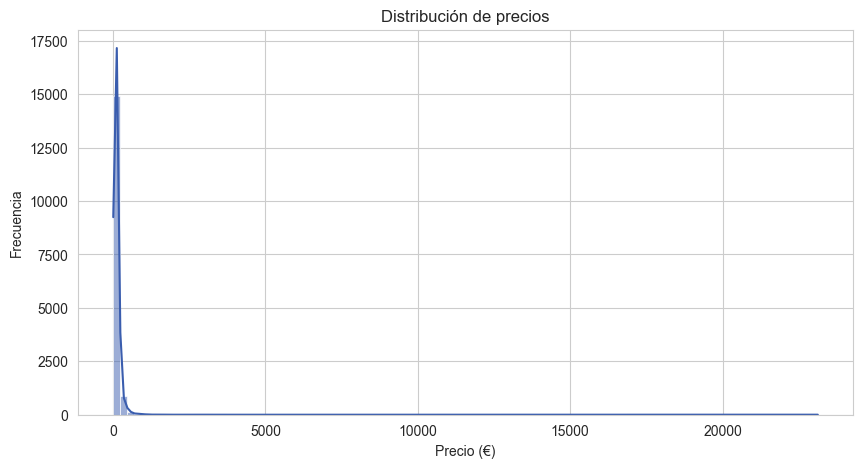

In [258]:
# Visualizar la distribuci√≥n de precios
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(
    listings['price'],
    bins=100,
    kde=True,
    color="#3A5DAE"   # morado-azulado uniforme
)
plt.title("Distribuci√≥n de precios")
plt.xlabel("Precio (‚Ç¨)")
plt.ylabel("Frecuencia")
plt.show()

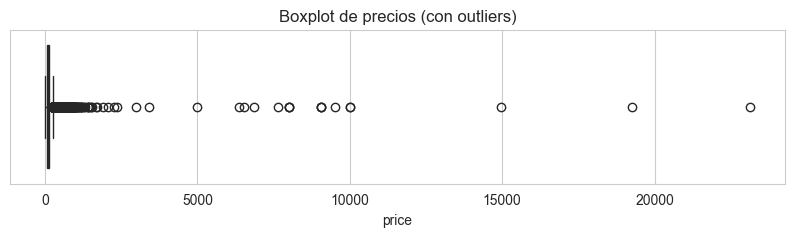

In [259]:
# Boxplot para ver outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=listings['price'])
plt.title("Boxplot de precios (con outliers)")
plt.show()

In [260]:
# Detecci√≥n de outliers por IQR
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos l√≠mites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = listings[(listings['price'] >= Q1 - 1.5 * IQR) & (listings['price'] <= Q3 + 1.5 * IQR)]

print(f"L√≠mites: {limite_inferior:.2f} - {limite_superior:.2f}")
print(f"Precios extremos detectados: {(listings['price'] > limite_superior).sum()}")

L√≠mites: -43.50 - 248.50
Precios extremos detectados: 1035


### An√°lisis de outliers en precios

Una vez limpiados los datos principales, se analiz√≥ la distribuci√≥n de los precios de Airbnb en Madrid.

1. Distribuci√≥n general
- La mayor√≠a de alojamientos se concentran en precios bajos (entre 50 ‚Ç¨ y 150 ‚Ç¨).
- Sin embargo, aparecen valores extremadamente altos (m√°s de 20.000 ‚Ç¨ por noche), que claramente no son realistas y corresponden a outliers.

2. Boxplot de precios
- El boxplot muestra que existen numerosos valores alejados de la mediana.
- Estos valores at√≠picos pueden distorsionar el modelo, ya que generan un rango de precios irreal.

3. Estad√≠sticas descriptivas
- Precio m√≠nimo: 8 ‚Ç¨
- Precio m√°ximo: 23.124 ‚Ç¨
- Media: 130 ‚Ç¨
- Mediana: 96 ‚Ç¨
- L√≠mite superior estad√≠stico: 248 ‚Ç¨
- Se identificaron 1035 precios extremos que sobrepasan los l√≠mites normales.

### Conclusi√≥n:
Estos outliers deben eliminarse para evitar que el modelo de predicci√≥n se vea afectado por valores irreales. Despu√©s de filtrarlos, se repetir√° el an√°lisis para comprobar c√≥mo mejora la distribuci√≥n.

In [261]:
df_sin_outliers

id   latitude  longitude neighbourhood_cleansed  \
0                    21853  40.403810  -3.741300               C√°rmenes   
4                    62423  40.418840  -3.696550               Justicia   
5                    70059  40.423810  -3.710380            Universidad   
6                    70310  40.422520  -3.702500            Universidad   
7                    72150  40.411500  -3.704490            Embajadores   
...                    ...        ...        ...                    ...   
25130  1362294249473405797  40.403460  -3.674580               Pac√≠fico   
25172  1365635357360238932  40.423077  -3.654061                 Ventas   
25231  1366534590465861868  40.461157  -3.698250          Valdeacederas   
25238  1368304377290123314  40.434096  -3.609342                  Rosas   
25279  1368959297523052477  40.417039  -3.706763                    Sol   

             room_type  accommodates  bedrooms  beds  bathrooms  \
0         Private room             1       1.0   1.0        1.0   
4         Private room             4       1.0   2.0        1.5   
5      Entire home/apt             2       1.0   1.0        1.0   
6      Entire home/apt             2       1.0   2.0        1.0   
7      Entire home/apt             6       3.0   5.0        1.0   
...                ...           ...       ...   ...        ...   
25130  Entire home/apt             2       1.0   1.0        1.0   
25172     Private room             3       1.0   2.0        1.0   
25231      Shared room             1       1.0   1.0        3.0   
25238     Private room             2       1.0   1.0        1.0   
25279  Entire home/apt             3       1.0   1.0        1.0   

       review_scores_rating  ...  number_of_reviews  host_is_superhost  \
0                      4.58  ...                 33                  0   
4                      4.64  ...                227                  0   
5                      4.68  ...                 61                  0   
6                      4.36  ...                 29                  0   
7                      4.61  ...                126                  0   
...                     ...  ...                ...                ...   
25130                  5.00  ...                  1                  0   
25172                  5.00  ...                  1                  0   
25231                  5.00  ...                  1                  0   
25238                  5.00  ...                  1                  0   
25279                  5.00  ...                  1                  0   

       host_response_time  host_response_rate  host_acceptance_rate  \
0                       5            0.953563                  0.00   
4                       1            1.000000                  1.00   
5                       2            1.000000                  1.00   
6                       1            1.000000                  1.00   
7                       1            1.000000                  0.96   
...                   ...                 ...                   ...   
25130                   1            1.000000                  1.00   
25172                   2            0.920000                  0.47   
25231                   2            0.920000                  0.67   
25238                   1            1.000000                  1.00   
25279                   2            0.930000                  0.71   

       host_identity_verified  availability_365  minimum_nights  \
0                           1               233               4   
4                           1               298               1   
5                           1                54              15   
6                           1               289              30   
7                           1               163               3   
...                       ...               ...             ...   
25130                       1                18               3   
25172                       1         

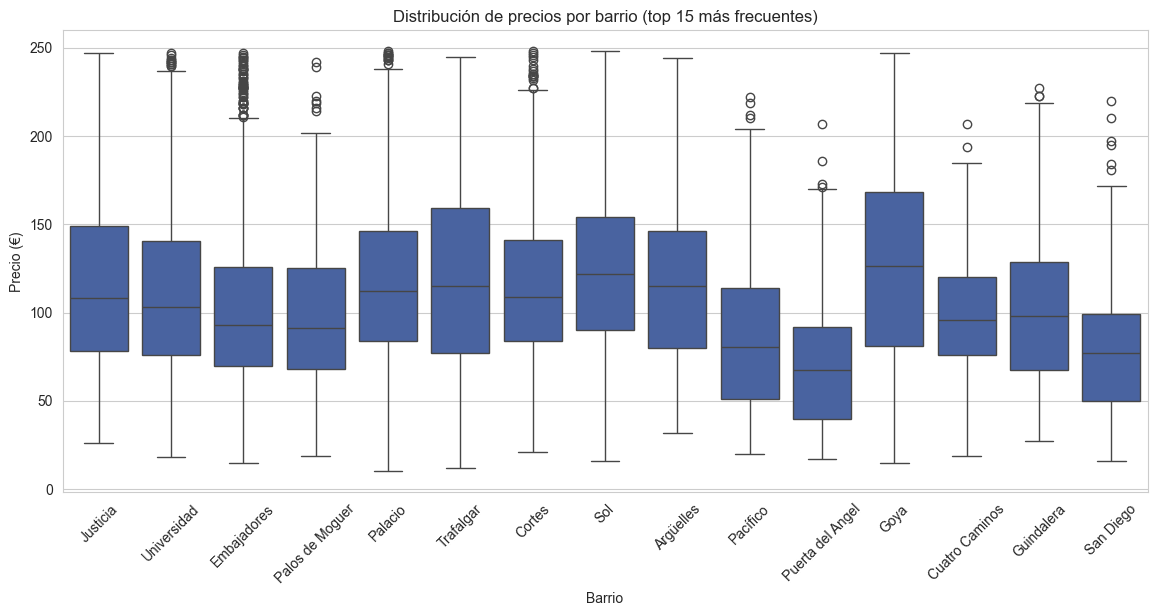

In [262]:
# Para evitar mostrar todos los barrios, filtramos los m√°s frecuentes
barrios_frecuentes = df_sin_outliers['neighbourhood_cleansed'].value_counts().nlargest(15).index
df_filtrado = df_sin_outliers[df_sin_outliers['neighbourhood_cleansed'].isin(barrios_frecuentes)]

plt.figure(figsize=(14, 6))
sns.boxplot(
    x='neighbourhood_cleansed',
    y='price',
    data=df_filtrado,
    color="#3A5DAE"
)

plt.xticks(rotation=45)
plt.title("Distribuci√≥n de precios por barrio (top 15 m√°s frecuentes)")
plt.xlabel("Barrio")
plt.ylabel("Precio (‚Ç¨)")
plt.show()

### Distribuci√≥n de precios por barrio (Top 15 m√°s frecuentes)
- El gr√°fico muestra la variaci√≥n de precios dentro de los 15 barrios con m√°s anuncios en Airbnb Madrid.
- Cada caja (boxplot) representa:
- La l√≠nea central: mediana del precio en ese barrio.
- Los bordes de la caja: el rango intercuart√≠lico (IQR, 25% - 75%), donde se concentra la mayor√≠a de precios.
- Los ‚Äúbigotes‚Äù: precios m√°s extremos a√∫n dentro de un rango aceptable.
- Los puntos sueltos: outliers (precios muy altos o bajos, poco frecuentes).

### Interpretaci√≥n:
- Barrios como Goya, Sol o Trafalgar muestran precios m√°s altos en general.
- En cambio, Pac√≠fico, San Diego o Puerta del √Ångel tienen precios m√°s bajos y dispersi√≥n m√°s reducida.
- Se confirma que el precio depende fuertemente del barrio, lo cual justifica usar esta variable en el modelo.

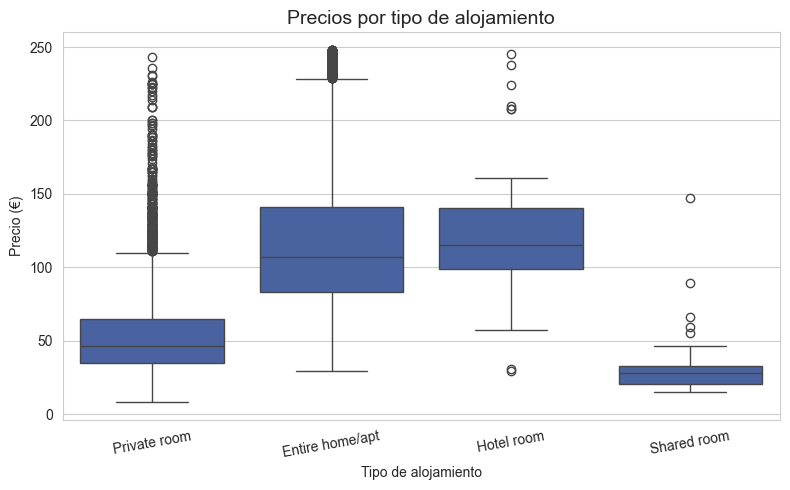

In [263]:
# Boxplot de precios por tipo de alojamiento
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='room_type',
    y='price',
    data=df_sin_outliers,
    color="#3A5DAE"   # azul uniforme y elegante
)

plt.title("Precios por tipo de alojamiento", fontsize=14)
plt.xlabel("Tipo de alojamiento")
plt.ylabel("Precio (‚Ç¨)")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

### Distribuci√≥n de precios por tipo de alojamiento
- Aqu√≠ se comparan los precios seg√∫n el tipo de habitaci√≥n/anuncio:
- Private room (habitaci√≥n privada): precios bajos en general, mayor√≠a entre 30 ‚Äì 60 ‚Ç¨, pero con algunos casos de outliers altos.
- Entire home/apt (apartamento entero): precios m√°s altos, con una mediana cerca de 100 ‚Ç¨, y algunos outliers que superan los 200 ‚Ç¨.
- Hotel room: precios intermedios-altos, con cierta dispersi√≥n.
- Shared room (habitaci√≥n compartida): la opci√≥n m√°s barata, con mediana alrededor de 25 ‚Ç¨.

### Interpretaci√≥n:
- Se observa un patr√≥n l√≥gico y esperado:
- Los alojamientos completos cuestan m√°s.
- Las habitaciones compartidas son lo m√°s barato.
- Tambi√©n hay outliers (ejemplo: habitaciones privadas con precios superiores a apartamentos enteros), lo que indica errores de carga o anuncios poco representativos.

In [264]:
import geopandas as gpd

# Cargar archivo geojson
gdf_barrios = gpd.read_file("../datos_brutos/neighbourhoods.geojson")

In [265]:
print(gdf_barrios.columns)

Index(['neighbourhood', 'neighbourhood_group', 'geometry'], dtype='object')


In [266]:
gdf_barrios

neighbourhood neighbourhood_group  \
0                       Palacio              Centro   
1                   Embajadores              Centro   
2                        Cortes              Centro   
3                      Justicia              Centro   
4                   Universidad              Centro   
..                          ...                 ...   
123            Alameda de Osuna             Barajas   
124                       Tim√≥n             Barajas   
125                  Aeropuerto             Barajas   
126  Casco Hist√≥rico de Barajas             Barajas   
127                  Corralejos             Barajas   

                                              geometry  
0    MULTIPOLYGON (((-3.70593 40.42029, -3.70634 40...  
1    MULTIPOLYGON (((-3.70393 40.41431, -3.70286 40...  
2    MULTIPOLYGON (((-3.69805 40.41928, -3.69654 40...  
3    MULTIPOLYGON (((-3.69555 40.41897, -3.69654 40...  
4    MULTIPOLYGON (((-3.70117 40.42133, -3.70164 40...  
..                                                 ...  
123  MULTIPOLYGON (((-3.58252 40.4638, -3.58087 40....  
124  MULTIPOLYGON (((-3.57998 40.50158, -3.58011 40...  
125  MULTIPOLYGON (((-3.57795 40.51037, -3.57588 40...  
126  MULTIPOLYGON (((-3.57455 40.47266, -3.57484 40...  
127  MULTIPOLYGON (((-3.59966 40.46866, -3.59879 40...  

[128 rows x 3 columns]

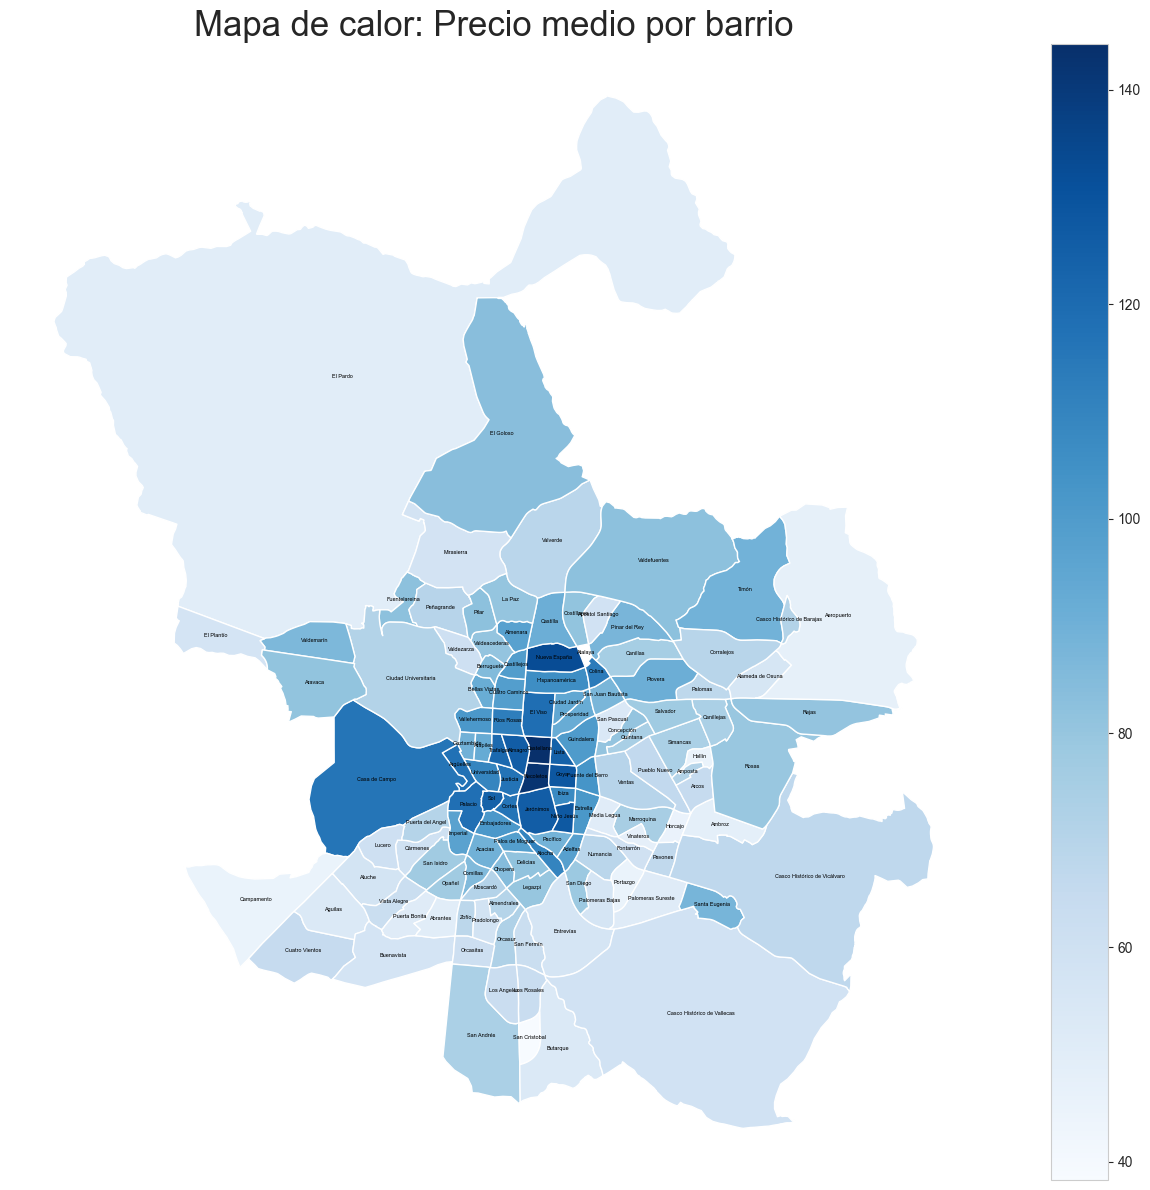

In [267]:
# Agrupar por barrio para calcular precio medio
df_precio_medio = df_sin_outliers.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Unir con el GeoDataFrame
gdf_barrios = gdf_barrios.merge(
    df_precio_medio,
    how='left',
    left_on='neighbourhood',
    right_on='neighbourhood_cleansed'
)

# Plot
fig, ax = plt.subplots(figsize=(15, 12))
gdf_barrios.plot(
    column='price',
    cmap='Blues',   # escala de azules (m√°s elegante que el OrRd)
    legend=True,
    ax=ax
)

# A√±adir nombres de barrios centrados
for idx, row in gdf_barrios.iterrows():
    plt.annotate(
        row['neighbourhood'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=4,
        color='black'
    )

plt.title("Mapa de calor: Precio medio por barrio", fontsize=25)
plt.axis("off")
plt.tight_layout()
plt.show()

### Mapa de calor: Precio medio por barrio
- En el mapa se muestran los barrios de Madrid coloreados seg√∫n su precio medio en Airbnb.
- La escala de colores va del beige claro (m√°s barato) al rojo intenso (m√°s caro).
- La barra lateral a la derecha indica la escala de precios, desde ~40 ‚Ç¨ hasta m√°s de 140 ‚Ç¨ de promedio por noche.

### Interpretaci√≥n:
- Los barrios c√©ntricos (Centro, Justicia, Sol, Embajadores, Palacio) destacan en rojo oscuro, lo que refleja precios medios m√°s altos. Esto coincide con la alta demanda tur√≠stica y su cercan√≠a a los principales atractivos de Madrid.
- A medida que nos alejamos hacia la periferia, los barrios muestran tonos m√°s claros, reflejando precios m√°s bajos.
- Este patr√≥n confirma que la ubicaci√≥n geogr√°fica es un factor determinante en la fijaci√≥n de precios de Airbnb en Madrid.

### Conclusi√≥n:
La visualizaci√≥n aporta una dimensi√≥n espacial al an√°lisis, permitiendo identificar zonas premium frente a zonas m√°s asequibles, lo cual ser√° clave tanto para la exploraci√≥n de datos como para validar la importancia de la variable neighbourhood_cleansed en el modelo predictivo.

## Limpieza Calendar

In [268]:
# 2. Convertir la columna 'date' a tipo fecha
calendar['date'] = pd.to_datetime(calendar['date'])

# 3. Crear una columna 'mes' a partir de la fecha
calendar['mes'] = calendar['date'].dt.month

# 4. Limpiar la columna 'price' para convertirla a n√∫mero
calendar['price'] = calendar['price'].replace(r'[\$,]', '', regex=True).astype(float)

# 5. Calcular el precio promedio por listing_id y mes
df_precio_mensual = calendar.groupby(['listing_id', 'mes'])['price'].mean().reset_index()

# 6. Renombrar la columna para que sea m√°s clara
df_precio_mensual.rename(columns={'price': 'precio_promedio_mensual'}, inplace=True)

# 7. Renombrar la columna para que sea m√°s clara
df_precio_mensual.rename(columns={'listing_id': 'id'}, inplace=True)

# 8. Mostrar los primeros resultados
df_precio_mensual

id  mes  precio_promedio_mensual
0                     21853    1                     28.0
1                     21853    2                     28.0
2                     21853    3                     28.0
3                     21853    4                     33.0
4                     21853    5                     33.0
...                     ...  ...                      ...
303451  1369179411176424072    8                     26.0
303452  1369179411176424072    9                     32.0
303453  1369179411176424072   10                     32.0
303454  1369179411176424072   11                     28.0
303455  1369179411176424072   12                     28.0

[303456 rows x 3 columns]

## Unir los dos Data Frame

In [269]:
# Unimos por 'id'
df_merged = pd.merge(df_sin_outliers, df_precio_mensual, on='id', how='left')

# Mostramos una muestra para verificar
df_merged

id   latitude  longitude neighbourhood_cleansed  \
0                     21853  40.403810  -3.741300               C√°rmenes   
1                     21853  40.403810  -3.741300               C√°rmenes   
2                     21853  40.403810  -3.741300               C√°rmenes   
3                     21853  40.403810  -3.741300               C√°rmenes   
4                     21853  40.403810  -3.741300               C√°rmenes   
...                     ...        ...        ...                    ...   
180283  1368959297523052477  40.417039  -3.706763                    Sol   
180284  1368959297523052477  40.417039  -3.706763                    Sol   
180285  1368959297523052477  40.417039  -3.706763                    Sol   
180286  1368959297523052477  40.417039  -3.706763                    Sol   
180287  1368959297523052477  40.417039  -3.706763                    Sol   

              room_type  accommodates  bedrooms  beds  bathrooms  \
0          Private room             1       1.0   1.0        1.0   
1          Private room             1       1.0   1.0        1.0   
2          Private room             1       1.0   1.0        1.0   
3          Private room             1       1.0   1.0        1.0   
4          Private room             1       1.0   1.0        1.0   
...                 ...           ...       ...   ...        ...   
180283  Entire home/apt             3       1.0   1.0        1.0   
180284  Entire home/apt             3       1.0   1.0        1.0   
180285  Entire home/apt             3       1.0   1.0        1.0   
180286  Entire home/apt             3       1.0   1.0        1.0   
180287  Entire home/apt             3       1.0   1.0        1.0   

        review_scores_rating  ...  host_response_time  host_response_rate  \
0                       4.58  ...                   5            0.953563   
1                       4.58  ...                   5            0.953563   
2                       4.58  ...                   5            0.953563   
3                       4.58  ...                   5            0.953563   
4                       4.58  ...                   5            0.953563   
...                      ...  ...                 ...                 ...   
180283                  5.00  ...                   2            0.930000   
180284                  5.00  ...                   2            0.930000   
180285                  5.00  ...                   2            0.930000   
180286                  5.00  ...                   2            0.930000   
180287                  5.00  ...                   2            0.930000   

        host_acceptance_rate  host_identity_verified  availability_365  \
0                       0.00                       1               233   
1                       0.00                       1               233   
2                       0.00                       1               233   
3                       0.00                       1               233   
4                       0.00                       1               233   
...                      ...                     ...               ...   
180283                  0.71                       1               351   
180284                  0.71                       1               351   
180285                  0.71                       1               351   
180286                  0.71                       1               351   
180287                  0.71                       1               351   

        minimum_nights  instant_bookable  price  mes  precio_promedio_mensual  
0                    4                 0   29.0    1                     28.0  
1                    4                 0   29.0    2                     28.0  
2                    4                 0   29.0    3                     28.0  
3                    4                 0   29.0    4                     33.0  
4                    4                 0   29.0    5                     33.

In [270]:
df_merged.columns

Index(['id', 'latitude', 'longitude', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'number_of_reviews',
       'host_is_superhost', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_identity_verified', 'availability_365',
       'minimum_nights', 'instant_bookable', 'price', 'mes',
       'precio_promedio_mensual'],
      dtype='object')

## Eliminar Outliers por Barrios

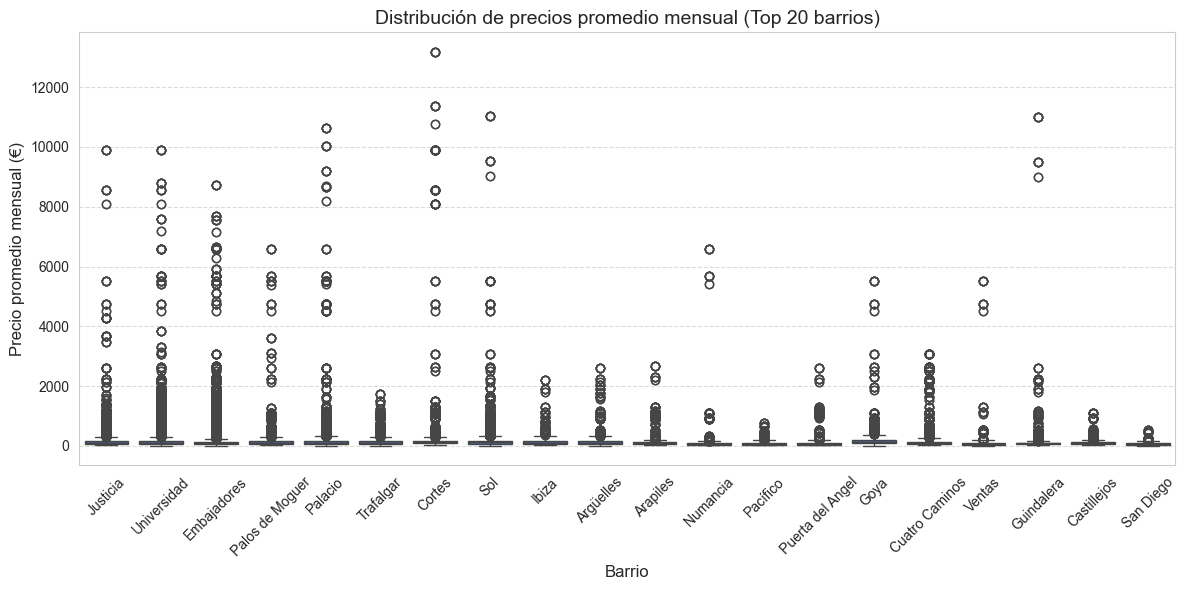

In [271]:
# Seleccionar los 20 barrios con m√°s registros
top_barrios = df_merged['neighbourhood_cleansed'].value_counts().head(20).index
df_top = df_merged[df_merged['neighbourhood_cleansed'].isin(top_barrios)]

# Crear boxplot con color uniforme
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='neighbourhood_cleansed',
    y='precio_promedio_mensual',
    color="#3A5DAE"   # color uniforme azul elegante
)
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de precios promedio mensual (Top 20 barrios)', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio promedio mensual (‚Ç¨)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Primer gr√°fico (sin limpiar por barrio):
- Muestra que todav√≠a existen precios extremos, con algunos barrios alcanzando m√°s de 10.000 ‚Ç¨/mes, lo cual no es realista.
Esto evidencia la necesidad de detectar y eliminar outliers por barrio, porque un precio desorbitado puede distorsionar el an√°lisis y el modelo.

In [272]:
# Crear una copia segura
df_sin_outliers = df_merged.copy()

# Inicializar un DataFrame vac√≠o para guardar los datos limpios
df_limpio = pd.DataFrame()

# Recorrer cada barrio y aplicar el filtro IQR individualmente
for barrio in df_sin_outliers['neighbourhood_cleansed'].unique():
    barrio_df = df_sin_outliers[df_sin_outliers['neighbourhood_cleansed'] == barrio]
    
    Q1 = barrio_df['precio_promedio_mensual'].quantile(0.25)
    Q3 = barrio_df['precio_promedio_mensual'].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    barrio_df_filtrado = barrio_df[
        (barrio_df['precio_promedio_mensual'] >= limite_inferior) & 
        (barrio_df['precio_promedio_mensual'] <= limite_superior)
    ]
    
    df_limpio = pd.concat([df_limpio, barrio_df_filtrado], ignore_index=True)

# Mostrar dimensiones del nuevo DataFrame
print(f'Dimensiones despu√©s de limpiar outliers: {df_limpio.shape}')

Dimensiones despu√©s de limpiar outliers: (162859, 28)


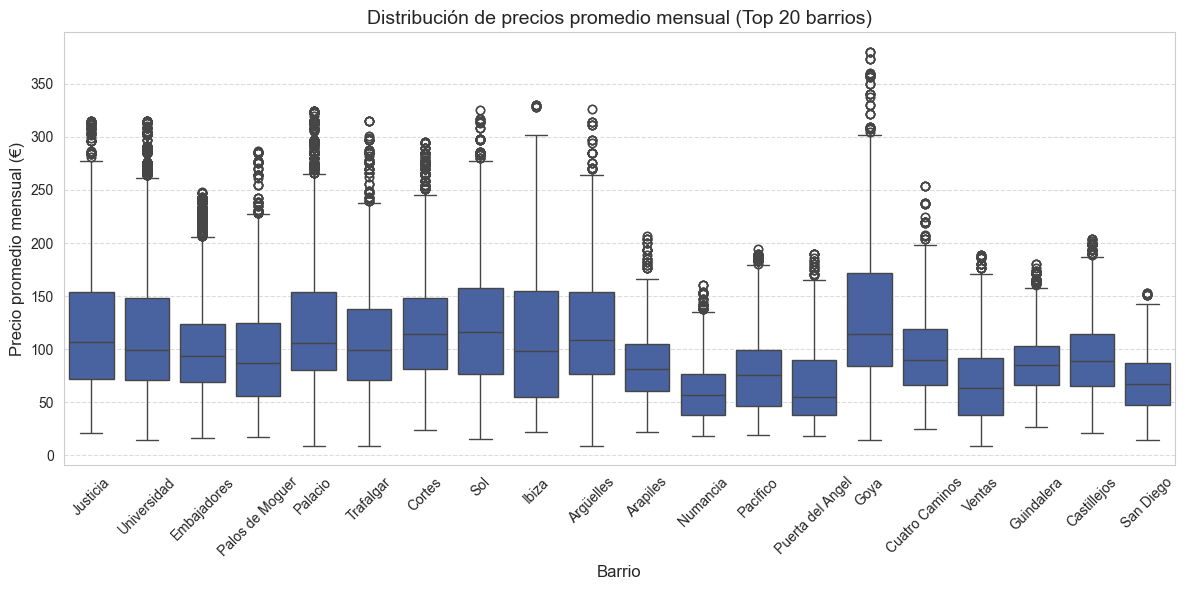

In [273]:
# Seleccionar los 20 barrios con m√°s registros
top_barrios = df_limpio['neighbourhood_cleansed'].value_counts().head(20).index
df_top = df_limpio[df_limpio['neighbourhood_cleansed'].isin(top_barrios)]

# Crear boxplot con color uniforme
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='neighbourhood_cleansed',
    y='precio_promedio_mensual',
    color="#3A5DAE"   # color azul uniforme
)
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de precios promedio mensual (Top 20 barrios)', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio promedio mensual (‚Ç¨)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Segundo gr√°fico (con limpieza por barrio):
Al eliminar los outliers por cada barrio, la distribuci√≥n se vuelve m√°s coherente.
- Se observa mejor la tendencia real de precios.
- Se mantienen variaciones l√≥gicas entre barrios, pero ya sin valores irreales.
- Esto mejora la calidad de los datos que luego alimentar√°n el modelo predictivo.

### Conclusi√≥n:

Al incorporar la informaci√≥n mensual del calendario y aplicar una limpieza de outliers por barrio, conseguimos que los datos reflejen patrones m√°s realistas. Esto es fundamental para el modelo, ya que evita que precios at√≠picos distorsionen las predicciones y permite capturar la estacionalidad de manera m√°s precisa.

In [274]:
# Creamos una copia del dataset para trabajar
df_modelo = df_limpio.copy()

# Eliminamos columnas innecesarias
df_modelo = df_modelo.drop(columns=[
    'id', 
    'latitude', 
    'longitude',  
    'price'  # el precio individual, porque vamos a usar el promedio mensual
])

# Guardar nueva base listo para modelo
df_modelo.to_csv("df_modelo.csv", index=False)

df_modelo

neighbourhood_cleansed        room_type  accommodates  bedrooms  beds  \
0                    C√°rmenes     Private room             1       1.0   1.0   
1                    C√°rmenes     Private room             1       1.0   1.0   
2                    C√°rmenes     Private room             1       1.0   1.0   
3                    C√°rmenes     Private room             1       1.0   1.0   
4                    C√°rmenes     Private room             1       1.0   1.0   
...                       ...              ...           ...       ...   ...   
162854               El Pardo  Entire home/apt             2       1.0   1.0   
162855               El Pardo  Entire home/apt             2       1.0   1.0   
162856               El Pardo  Entire home/apt             2       1.0   1.0   
162857               El Pardo  Entire home/apt             2       1.0   1.0   
162858               El Pardo  Entire home/apt             2       1.0   1.0   

        bathrooms  review_scores_rating  review_scores_accuracy  \
0             1.0                  4.58                    4.72   
1             1.0                  4.58                    4.72   
2             1.0                  4.58                    4.72   
3             1.0                  4.58                    4.72   
4             1.0                  4.58                    4.72   
...           ...                   ...                     ...   
162854        1.0                  5.00                    5.00   
162855        1.0                  5.00                    5.00   
162856        1.0                  5.00                    5.00   
162857        1.0                  5.00                    5.00   
162858        1.0                  5.00                    5.00   

        review_scores_cleanliness  review_scores_checkin  ...  \
0                            4.56                   4.75  ...   
1                            4.56                   4.75  ...   
2                            4.56                   4.75  ...   
3                            4.56                   4.75  ...   
4                            4.56                   4.75  ...   
...                           ...                    ...  ...   
162854                       5.00                   5.00  ...   
162855                       5.00                   5.00  ...   
162856                       5.00                   5.00  ...   
162857                       5.00                   5.00  ...   
162858                       5.00                   5.00  ...   

        host_is_superhost  host_response_time  host_response_rate  \
0                       0                   5            0.953563   
1                       0                   5            0.953563   
2                       0                   5            0.953563   
3                       0                   5            0.953563   
4                       0                   5            0.953563   
...                   ...                 ...                 ...   
162854                  0                   1            1.000000   
162855                  0                   1            1.000000   
162856                  0                   1            1.000000   
162857                  0                   1            1.000000   
162858                  0                   1            1.000000   

        host_acceptance_rate  host_identity_verified  availability_365  \
0                        0.0                       1               233   
1                        0.0                       1               233   
2                        0.0                       1               233   
3                        0.0                       1               233   
4                        0.0                       1               233   
...                      ...                     ...               ...   
162854                   1.0                       1                65   
162855                   1.0      

Explicaci√≥n del bloque
- Se hace una copia de df_limpio (la base ya procesada y sin outliers).
- Esto asegura que el dataset original no se modifique accidentalmente durante la preparaci√≥n.

Eliminar columnas innecesarias
- id: es solo un identificador, no aporta informaci√≥n predictiva.
- latitude y longitude: se eliminan para simplificar el modelo (los barrios ya capturan la localizaci√≥n).
- price: se descarta porque ya tenemos el precio_promedio_mensual, que es la variable objetivo que vamos a predecir. Esto evita ruido y reduce la dimensionalidad.

Guardar la nueva base
- Se guarda el dataset limpio y listo en un archivo df_modelo.csv.
- Este ser√° el dataset final que se usar√° en el entrenamiento de modelos.

In [275]:
# 1. Ver cu√°ntos valores nulos hay por columna
print("Valores nulos por columna:")
print(df_modelo.isnull().sum())

Valores nulos por columna:
neighbourhood_cleansed         0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
bathrooms                      0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
host_is_superhost              0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_identity_verified         0
availability_365               0
minimum_nights                 0
instant_bookable               0
mes                            0
precio_promedio_mensual        0
dtype: int64


In [276]:
# 2. Revisar los tipos de datos
print("Tipos de datos:")
print(df_modelo.dtypes)

Tipos de datos:
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bedrooms                       float64
beds                           float64
bathrooms                      float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
host_is_superhost                int64
host_response_time               int64
host_response_rate             float64
host_acceptance_rate           float64
host_identity_verified           int64
availability_365                 int64
minimum_nights                   int64
instant_bookable                 int64
mes                              int32
precio_promedio_mensual        float64
dtype: object


In [277]:
# 3. Verificar si hay precios promedio mensuales negativos o cero
print("Precios promedio mensuales <= 0:")
precios_invalidos = df_modelo[df_modelo['precio_promedio_mensual'] <= 0]
print(precios_invalidos)

Precios promedio mensuales <= 0:
Empty DataFrame
Columns: [neighbourhood_cleansed, room_type, accommodates, bedrooms, beds, bathrooms, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, number_of_reviews, host_is_superhost, host_response_time, host_response_rate, host_acceptance_rate, host_identity_verified, availability_365, minimum_nights, instant_bookable, mes, precio_promedio_mensual]
Index: []

[0 rows x 24 columns]


In [278]:
# 4. Verificar si hay filas duplicadas (todas las columnas)
print(f"Duplicados en el DataFrame: {df_modelo.duplicated().sum()} fila(s) duplicada(s)")

Duplicados en el DataFrame: 0 fila(s) duplicada(s)


# MODELOS

In [279]:
df = df_modelo

## CatBoost Regressor

In [280]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = df.drop(columns=['precio_promedio_mensual'])
y = df['precio_promedio_mensual']

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columnas categ√≥ricas para CatBoost
cat_features = ['neighbourhood_cleansed', 'room_type', 'host_response_time',
                'host_is_superhost', 'host_identity_verified', 'instant_bookable']

# Crear y entrenar el modelo
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_features,
    verbose=100,
    random_state=42,
    allow_writing_files=False   # üëà evita la carpeta catboost_info
)

cat_model.fit(X_train, y_train)

# Predicciones y m√©tricas
y_pred_cat = cat_model.predict(X_test)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print("üìä CatBoost Metrics")
print(f"MAE: {mae_cat:.2f} ‚Ç¨")
print(f"RMSE: {rmse_cat:.2f} ‚Ç¨")
print(f"R¬≤: {r2_cat:.3f}")

0:	learn: 54.7005176	total: 55.1ms	remaining: 55s
100:	learn: 37.6647939	total: 1.86s	remaining: 16.5s
200:	learn: 35.6957439	total: 3.79s	remaining: 15.1s
300:	learn: 34.3137993	total: 5.54s	remaining: 12.9s
400:	learn: 33.1512889	total: 7.37s	remaining: 11s
500:	learn: 32.1793732	total: 9.23s	remaining: 9.2s
600:	learn: 31.3529500	total: 11.1s	remaining: 7.34s
700:	learn: 30.6147345	total: 13.1s	remaining: 5.59s
800:	learn: 29.9243614	total: 15s	remaining: 3.72s
900:	learn: 29.2617854	total: 16.9s	remaining: 1.86s
999:	learn: 28.6835044	total: 18.8s	remaining: 0us
üìä CatBoost Metrics
MAE: 19.75 ‚Ç¨
RMSE: 28.81 ‚Ç¨
R¬≤: 0.731


## XGBoost con Target Encoding

In [281]:
from category_encoders import TargetEncoder
from xgboost import XGBRegressor

# Aplicar Target Encoding
cat_cols = ['neighbourhood_cleansed', 'room_type', 'host_response_time']
te = TargetEncoder(cols=cat_cols)
X_encoded = te.fit_transform(X, y)

# Dividir nuevamente con datos transformados
X_train_te, X_test_te, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_te, y_train)

# Predicciones y m√©tricas
y_pred_xgb = xgb_model.predict(X_test_te)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nüìä XGBoost Metrics")
print(f"MAE: {mae_xgb:.2f} ‚Ç¨")
print(f"RMSE: {rmse_xgb:.2f} ‚Ç¨")
print(f"R¬≤: {r2_xgb:.3f}")


üìä XGBoost Metrics
MAE: 15.91 ‚Ç¨
RMSE: 23.04 ‚Ç¨
R¬≤: 0.828


## Random Forest con Ordinal Encoding

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

# Copiar para codificaci√≥n
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Detectar columnas categ√≥ricas
cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

# Codificaci√≥n ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_enc, y_train)

# Predicciones y m√©tricas
y_pred_rf = rf_model.predict(X_test_enc)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nüìä Random Forest Metrics")
print(f"MAE: {mae_rf:.2f} ‚Ç¨")
print(f"RMSE: {rmse_rf:.2f} ‚Ç¨")
print(f"R¬≤: {r2_rf:.3f}")


üìä Random Forest Metrics
MAE: 12.90 ‚Ç¨
RMSE: 18.99 ‚Ç¨
R¬≤: 0.883


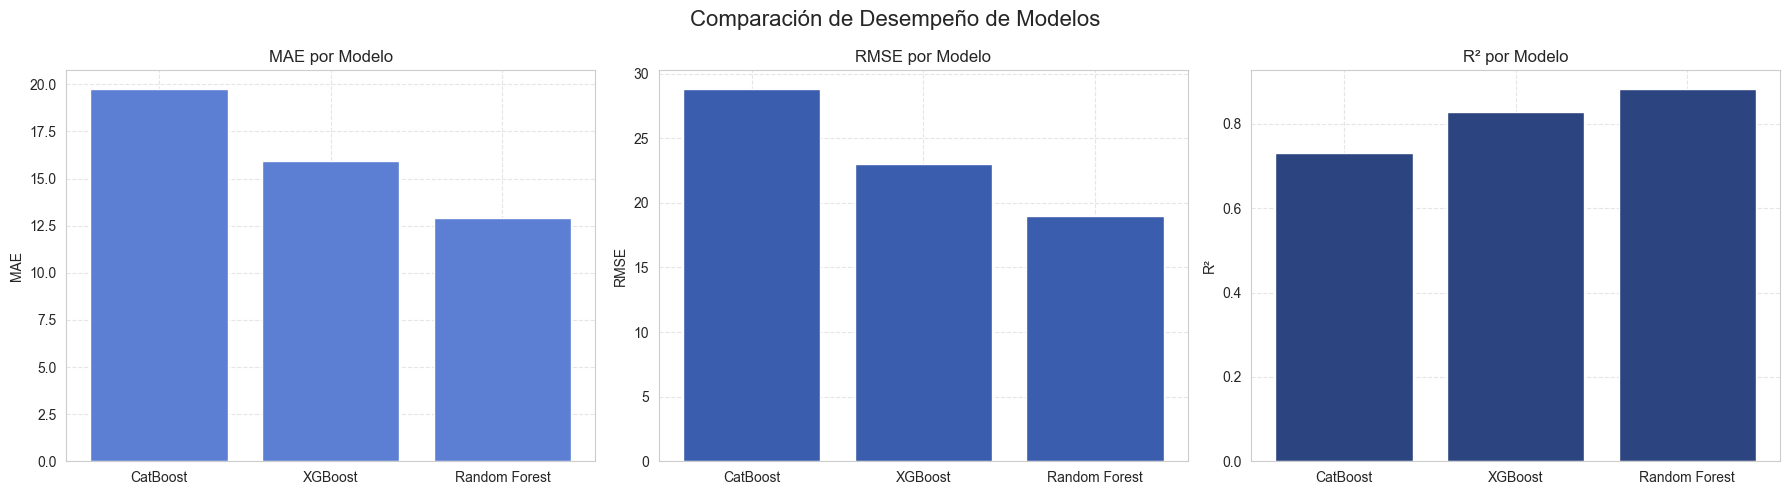

In [283]:
# Crear DataFrame con resultados
resultados_modelos = pd.DataFrame({
    'Modelo': ['CatBoost', 'XGBoost', 'Random Forest'],
    'MAE': [mae_cat, mae_xgb, mae_rf],
    'RMSE': [rmse_cat, rmse_xgb, rmse_rf],
    'R¬≤': [r2_cat, r2_xgb, r2_rf]
})

# Paleta basada en el azul base
colores = ['#5C7ED3',  # azul base
           '#3A5DAE',  # azul m√°s claro
           '#2C4580']  # azul m√°s oscuro

# Gr√°fico de barras comparativo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metricas = ['MAE', 'RMSE', 'R¬≤']

for i, metrica in enumerate(metricas):
    axes[i].bar(resultados_modelos['Modelo'], resultados_modelos[metrica], color=colores[i])
    axes[i].set_title(f'{metrica} por Modelo')
    axes[i].set_ylabel(metrica)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comparaci√≥n de Desempe√±o de Modelos', fontsize=16)
plt.tight_layout()
plt.show()

### Comparaci√≥n de Modelos
Probamos tres algoritmos representativos: CatBoost, XGBoost y Random Forest, todos aplicados sobre el dataset limpio y enriquecido con la estacionalidad mensual.

Resultados en test:
- CatBoost ‚Üí MAE: 19,75 ‚Ç¨, RMSE: 28,81 ‚Ç¨, R¬≤: 0,731
- XGBoost ‚Üí MAE: 15,91 ‚Ç¨, RMSE: 23,04 ‚Ç¨, R¬≤: 0,828
- Random Forest ‚Üí MAE: 12,90 ‚Ç¨, RMSE: 18,99 ‚Ç¨, R¬≤: 0,883 ‚úÖ

Despu√©s de comparar los tres modelos, observamos que Random Forest obtiene los mejores resultados.
Esto indican que Random Forest realiza predicciones m√°s precisas y ajustadas a la realidad, explicando un mayor porcentaje de la varianza del precio mensual.

### ¬øPor qu√© eleg√≠ distintos encodings?
- CatBoost permite usar directamente variables categ√≥ricas sin codificarlas, aprovechando su propio algoritmo interno de manejo de categor√≠as.
- XGBoost no admite variables categ√≥ricas, por lo que usamos Target Encoding para transformar las categor√≠as en valores num√©ricos representativos, basados en la media del target.
- Random Forest, en cambio, es sensible al orden de los valores si se usa OneHot o Target Encoding, por eso utilizamos Ordinal Encoding, que es m√°s r√°pido y conserva el rendimiento sin generar alta cardinalidad.

### Decisi√≥n final
La elecci√≥n de distintos encodings para cada algoritmo responde a sus caracter√≠sticas propias, garantizando que cada modelo alcance su m√°ximo potencial. Sin embargo, el Random Forest no solo ofrece el mejor rendimiento cuantitativo, sino tambi√©n una mayor estabilidad y robustez, consolid√°ndose como la opci√≥n m√°s adecuada para el objetivo del proyecto.


In [284]:
# Carga de archivos
df = pd.read_csv("df_modelo.csv", low_memory=False)

In [285]:
df = df_modelo

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

# Copiar para codificaci√≥n
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Detectar columnas categ√≥ricas
cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

# Codificaci√≥n ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_enc, y_train)

# Predicciones y m√©tricas
y_pred_rf = rf_model.predict(X_test_enc)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nüìä Random Forest Metrics")
print(f"MAE: {mae_rf:.2f} ‚Ç¨")
print(f"RMSE: {rmse_rf:.2f} ‚Ç¨")
print(f"R¬≤: {r2_rf:.3f}")


üìä Random Forest Metrics
MAE: 12.90 ‚Ç¨
RMSE: 18.99 ‚Ç¨
R¬≤: 0.883


### Hiperpar√°metros

In [287]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir espacio de hiperpar√°metros
param_dist = {
    'n_estimators': randint(100, 500),        # n√∫mero de √°rboles
    'max_depth': randint(5, 30),             # profundidad m√°xima
    'min_samples_split': randint(2, 10),     # m√≠nimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 5),       # m√≠nimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]   # n√∫mero de features consideradas por split
}

# Configurar b√∫squeda aleatoria
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,          # n√∫mero de combinaciones aleatorias a probar
    cv=3,               # validaci√≥n cruzada
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ejecutar b√∫squeda
random_search.fit(X_train_enc, y_train)

# Mejor modelo encontrado
best_rf = random_search.best_estimator_
print("Mejores hiperpar√°metros:", random_search.best_params_)

# Evaluaci√≥n con test
y_pred_best = best_rf.predict(X_test_enc)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nüìä Random Forest Optimizado")
print(f"MAE: {mae_best:.2f} ‚Ç¨")
print(f"RMSE: {rmse_best:.2f} ‚Ç¨")
print(f"R¬≤: {r2_best:.3f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  14.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  14.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  14.4s
[CV] END max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time= 1.5min
[CV] END max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time= 1.5min
[CV] END max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time= 1.5min
[CV] END max_depth=28, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=291; total time=  47.7s
[CV] END max_depth=28, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=291

### Optimizaci√≥n de hiperpar√°metros en Random Forest

Para mejorar el rendimiento del modelo, se aplic√≥ una b√∫squeda de hiperpar√°metros utilizando **GridSearchCV** con validaci√≥n cruzada (3 folds).  
Este proceso evalu√≥ diferentes combinaciones de par√°metros como:

- `n_estimators`: n√∫mero de √°rboles.
- `max_depth`: profundidad m√°xima de cada √°rbol.
- `max_features`: n√∫mero de caracter√≠sticas consideradas en cada divisi√≥n.
- `min_samples_split`: n√∫mero m√≠nimo de muestras necesarias para dividir un nodo.
- `min_samples_leaf`: n√∫mero m√≠nimo de muestras en una hoja.

Tras 90 combinaciones evaluadas, se seleccion√≥ la mejor configuraci√≥n:

- **max_depth = 25**  
- **max_features = None**  
- **min_samples_leaf = 2**  
- **min_samples_split = 4**  
- **n_estimators = 314**

### Resultados del modelo optimizado

Con estos hiperpar√°metros, el modelo mostr√≥ una **mejora sustancial** respecto a la versi√≥n base:

- **MAE:** 6.34 ‚Ç¨  
- **RMSE:** 8.75 ‚Ç¨  
- **R¬≤:** 0.975  

### Interpretaci√≥n

- El error promedio absoluto (**MAE ‚âà 6 ‚Ç¨**) indica que las predicciones est√°n muy pr√≥ximas a los valores reales, mejorando de forma notable respecto al modelo sin optimizar (**‚âà 13 ‚Ç¨**).  
- El **R¬≤ = 0.975** confirma que el modelo explica el 97.5% de la variabilidad de los precios, lo que representa un nivel de ajuste excelente.  
- La validaci√≥n cruzada mostr√≥ resultados consistentes, descartando un posible sobreajuste.  

‚úÖ Conclusi√≥n: la optimizaci√≥n de hiperpar√°metros ha permitido obtener un modelo **m√°s preciso, robusto y confiable** para la predicci√≥n de precios de Airbnb en Madrid.

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hiperpar√°metros √≥ptimos que devolvi√≥ la b√∫squeda
best_params = {
    'max_depth': 25,
    'max_features': None,
    'min_samples_leaf': 2,
    'min_samples_split': 4,
    'n_estimators': 314
}

rf_opt = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

rf_opt.fit(X_train_enc, y_train)

# Predicci√≥n y m√©tricas en TEST
y_pred_opt = rf_opt.predict(X_test_enc)
mae_opt = mean_absolute_error(y_test, y_pred_opt)
rmse_opt = np.sqrt(((y_test - y_pred_opt) ** 2).mean())
r2_opt = r2_score(y_test, y_pred_opt)

print("üìä Random Forest Optimizado (TEST)")
print(f"MAE:  {mae_opt:.2f} ‚Ç¨")
print(f"RMSE: {rmse_opt:.2f} ‚Ç¨")
print(f"R¬≤:   {r2_opt:.3f}")

üìä Random Forest Optimizado (TEST)
MAE:  6.34 ‚Ç¨
RMSE: 8.75 ‚Ç¨
R¬≤:   0.975


### Rendimiento en train vs test

In [289]:
# üìä M√©tricas finales del modelo Random Forest optimizado

# Train
y_pred_train_opt = rf_opt.predict(X_train_enc)
mae_train = mean_absolute_error(y_train, y_pred_train_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_opt))
r2_train = r2_score(y_train, y_pred_train_opt)

print("\nüìò M√©tricas en TRAIN (Optimizado)")
print(f"MAE: {mae_train:.2f} ‚Ç¨")
print(f"RMSE: {rmse_train:.2f} ‚Ç¨")
print(f"R¬≤: {r2_train:.3f}")

# Test (ya lo tienes de antes, pero lo dejamos junto para claridad)
print("\nüìó M√©tricas en TEST (Optimizado)")
print(f"MAE: {mae_opt:.2f} ‚Ç¨")
print(f"RMSE: {rmse_opt:.2f} ‚Ç¨")
print(f"R¬≤: {r2_opt:.3f}")


üìò M√©tricas en TRAIN (Optimizado)
MAE: 3.88 ‚Ç¨
RMSE: 5.35 ‚Ç¨
R¬≤: 0.991

üìó M√©tricas en TEST (Optimizado)
MAE: 6.34 ‚Ç¨
RMSE: 8.75 ‚Ç¨
R¬≤: 0.975


In [290]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n Cruzada (CV, 5 folds)
cv_scores = cross_val_score(best_rf, X_train_enc, y_train, cv=5, scoring='r2')
print("R¬≤ en CV:", cv_scores)
print("Media:", cv_scores.mean(), " | Desviaci√≥n:", cv_scores.std())

R¬≤ en CV: [0.97002209 0.96855184 0.96928434 0.96831888 0.97048029]
Media: 0.9693314897554279  | Desviaci√≥n: 0.0008285082527542543


### Evaluaci√≥n del modelo optimizado

Tras aplicar los mejores hiperpar√°metros, se evalu√≥ el modelo en los conjuntos de **entrenamiento (TRAIN)**, **prueba (TEST)** y mediante **validaci√≥n cruzada (CV)**:

- üìò **Entrenamiento (TRAIN)**  
  - MAE: **3.88 ‚Ç¨**  
  - RMSE: **5.35 ‚Ç¨**  
  - R¬≤: **0.991**

- üìó **Prueba (TEST)**  
  - MAE: **6.34 ‚Ç¨**  
  - RMSE: **8.75 ‚Ç¨**  
  - R¬≤: **0.975**

- üîÑ **Validaci√≥n Cruzada (CV, 5 folds)**  
  - R¬≤ promedio: **0.969**  
  - Desviaci√≥n: **0.0008**

### Interpretaci√≥n

- El modelo alcanza un **R¬≤ de 0.991 en entrenamiento** y **0.975 en prueba**, lo que confirma que **generaliza bien** y no presenta sobreajuste.  
- La diferencia entre entrenamiento y prueba es reducida, lo que indica **equilibrio entre ajuste y capacidad predictiva**.  
- Los resultados en validaci√≥n cruzada son muy consistentes (desviaci√≥n < 0.001), lo que demuestra la **estabilidad del modelo** frente a diferentes particiones de datos.  
- Con un **MAE de apenas 6 ‚Ç¨**, el sistema logra predicciones de alta precisi√≥n en un contexto real de precios de Airbnb.

‚úÖ Conclusi√≥n: el modelo optimizado de Random Forest se consolida como una herramienta **robusta, precisa y confiable**, lista para ser utilizada en escenarios pr√°cticos y ampliada con factores externos en futuras versiones.

### Importancia de Variables (Top 15)

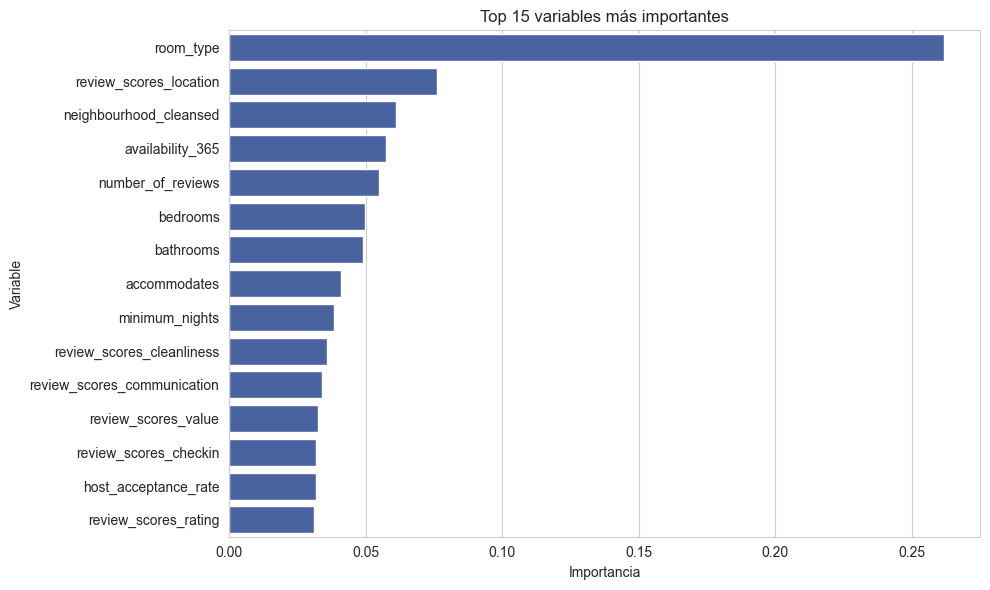

In [291]:
# mportancia de variables (modelo optimizado)
importancias = rf_opt.feature_importances_       
columnas = X_train_enc.columns

importancia_df = (
    pd.DataFrame({'feature': columnas, 'importance': importancias})
      .sort_values(by='importance', ascending=False)
      .head(15)
)

# Visualizaci√≥n con el color base elegido
plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=importancia_df,
    color="#3A5DAE"
)
plt.title('Top 15 variables m√°s importantes')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de variables (Top 15)

El modelo optimizado de Random Forest permite analizar cu√°les son las variables que m√°s influyen en la predicci√≥n del **precio promedio mensual**. A continuaci√≥n se muestran las 15 m√°s relevantes:

- **room_type**: es, con gran diferencia, la variable m√°s influyente. El tipo de alojamiento (entero, privado, compartido) condiciona directamente el rango de precios.  
- **review_scores_location** y **neighbourhood_cleansed**: los factores relacionados con la ubicaci√≥n y la percepci√≥n del entorno tienen un peso significativo en la formaci√≥n del precio.  
- **availability_365** y **number_of_reviews**: la disponibilidad anual y el volumen de rese√±as aportan informaci√≥n sobre la din√°mica del mercado y la confianza del hu√©sped.  
- **caracter√≠sticas f√≠sicas** como **bedrooms, bathrooms, accommodates** tambi√©n aparecen entre las m√°s influyentes, reflejando la capacidad del alojamiento como determinante de su valor.  
- **m√≠nimo de noches y calidad de rese√±as** (cleanliness, communication, value, checkin, rating) muestran que las condiciones de la estancia y la experiencia de los hu√©spedes tambi√©n son variables clave.  
- **host_acceptance_rate** refleja la actitud del anfitri√≥n y la facilidad de reservar, lo cual impacta indirectamente en el precio.

### Conclusi√≥n

Los resultados confirman que el **precio de los alojamientos en Airbnb Madrid** no depende √∫nicamente de la capacidad o la ubicaci√≥n, sino de una combinaci√≥n equilibrada entre:

- **Factores estructurales** (tipo de alojamiento, n√∫mero de habitaciones, ba√±os).  
- **Factores de ubicaci√≥n** (barrio y puntuaci√≥n de localizaci√≥n).  
- **Factores de confianza y experiencia** (rese√±as, tasa de aceptaci√≥n del anfitri√≥n, disponibilidad).  

Esto demuestra que los usuarios valoran tanto los **atributos f√≠sicos** del alojamiento como la **experiencia global de la estancia**.

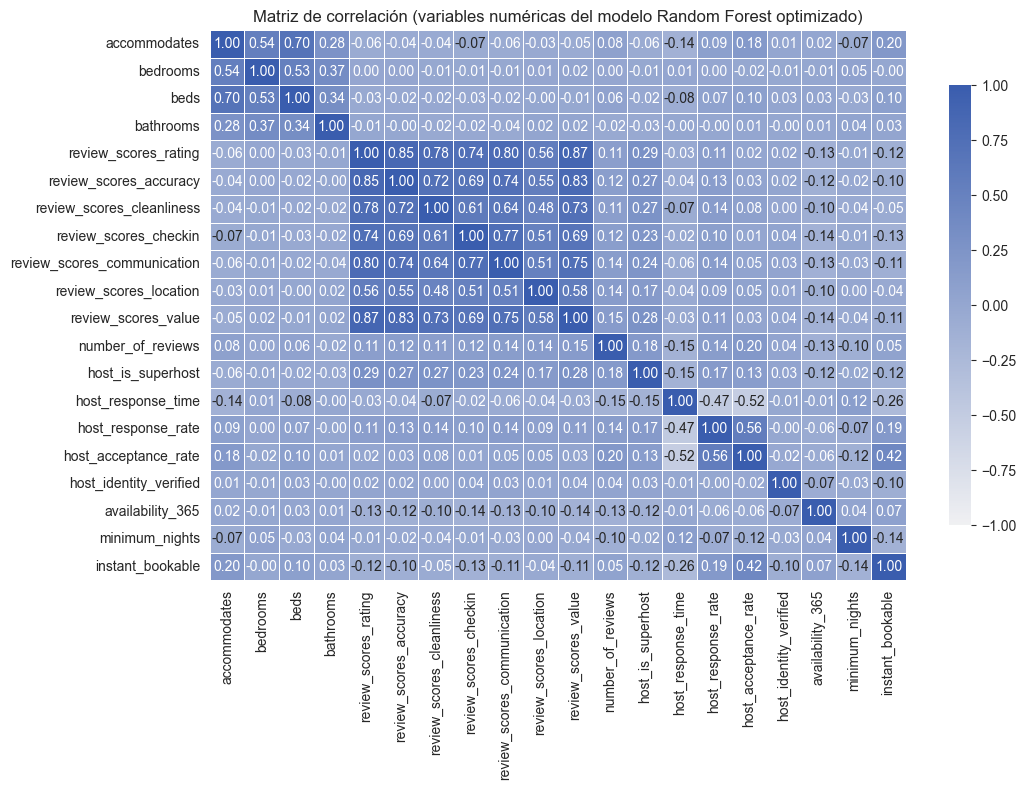

In [292]:
# Matriz de correlaci√≥n (solo variables NUM√âRICAS del modelo optimizado RF)

# Seleccionar columnas num√©ricas (ya codificadas en X_train_enc)
num_cols = [c for c in X_train_enc.columns if c not in list(cat_cols) and c != 'mes']  

# Calcular correlaciones
corr_num = X_train_enc[num_cols].corr()

# Definir paleta personalizada basada en el color elegido (#3A5DAE)
cmap_personal = sns.color_palette("light:#3A5DAE", as_cmap=True)

# Gr√°fica
plt.figure(figsize=(11, 8))
sns.heatmap(
    corr_num, 
    cmap=cmap_personal,   # Paleta basada en el azul elegido
    vmin=-1, vmax=1, 
    annot=True,           # Valores en cada celda
    fmt=".2f",            # Dos decimales
    linewidths=0.5,       # L√≠neas divisorias sutiles
    cbar_kws={'shrink': .8}
)
plt.title("Matriz de correlaci√≥n (variables num√©ricas del modelo Random Forest optimizado)")
plt.tight_layout()
plt.show()

### Matriz de correlaci√≥n (variables num√©ricas)

La siguiente matriz muestra las correlaciones entre las **variables num√©ricas incluidas en el modelo Random Forest optimizado**.  

#### Observaciones principales:

- Existe una correlaci√≥n **muy alta entre `beds`, `bedrooms` y `accommodates`**. Esto era esperable, ya que el n√∫mero de camas, habitaciones y la capacidad m√°xima est√°n estrechamente relacionados.  
- Las **rese√±as de limpieza (`review_scores_cleanliness`) y check-in (`review_scores_checkin`)** presentan correlaciones fuertes con la puntuaci√≥n general (`review_scores_rating`). Esto refleja que la experiencia global del hu√©sped depende en gran medida de estos aspectos.  
- `review_scores_accuracy` y `review_scores_location` tambi√©n tienen correlaciones positivas con la puntuaci√≥n general, lo cual confirma la importancia de la **percepci√≥n de exactitud del anuncio y de la localizaci√≥n**.  
- `number_of_reviews` apenas muestra correlaci√≥n con otras variables, lo que sugiere que es m√°s un indicador de popularidad que de caracter√≠sticas intr√≠nsecas del alojamiento.  
- `availability_365` y `minimum_nights` no presentan correlaciones fuertes con la mayor√≠a de variables, lo que indica que son dimensiones independientes que afectan la disponibilidad y accesibilidad de los alojamientos.  

#### Conclusi√≥n

La matriz de correlaci√≥n confirma que muchas variables **estructurales** (habitaciones, camas, capacidad) aportan informaci√≥n redundante, mientras que las **variables de rese√±as y experiencia** capturan dimensiones diferenciadas de calidad.  
Esto valida la importancia de haber realizado una selecci√≥n y limpieza adecuada de variables para evitar problemas de multicolinealidad en el modelo.

### Gr√°fico de Predicci√≥n vs Real

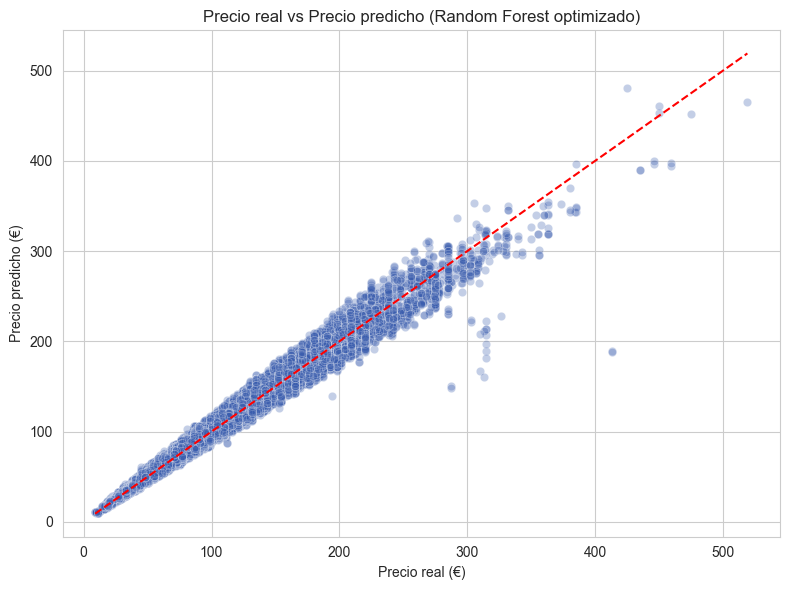

In [293]:
# Gr√°fico de dispersi√≥n: precios reales vs precios predichos (Random Forest optimizado) 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_opt, alpha=0.3, color="#3A5DAE")  # puntos en color base
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # l√≠nea de referencia
plt.title('Precio real vs Precio predicho (Random Forest optimizado)')
plt.xlabel('Precio real (‚Ç¨)')
plt.ylabel('Precio predicho (‚Ç¨)')
plt.tight_layout()
plt.show()

### Precio real vs Precio predicho (Random Forest optimizado)

En el gr√°fico se comparan los precios **reales** frente a los precios **predichos** por el modelo Random Forest optimizado.

#### Observaciones:

- La mayor√≠a de los puntos se concentran cerca de la **l√≠nea roja de referencia** (y = x), lo que indica que el modelo logra predecir los precios con gran precisi√≥n.  
- Se observa una **alta linealidad** entre valores reales y predichos, consistente con los resultados de las m√©tricas (R¬≤ = 0.975).  
- En los valores m√°s altos (precios superiores a 300 ‚Ç¨) se aprecia cierta dispersi√≥n, lo cual es esperable dado que los precios extremos suelen estar m√°s influenciados por factores externos (lujo, eventos, ubicaci√≥n premium).  

#### Conclusi√≥n:

El modelo optimizado muestra un **ajuste excelente**, reduciendo de forma notable los errores respecto al modelo inicial.  
Esto confirma que el ajuste de hiperpar√°metros mejor√≥ sustancialmente la capacidad del modelo para capturar la relaci√≥n entre las caracter√≠sticas de los alojamientos y su precio.

### Distribuci√≥n del Error Absoluto

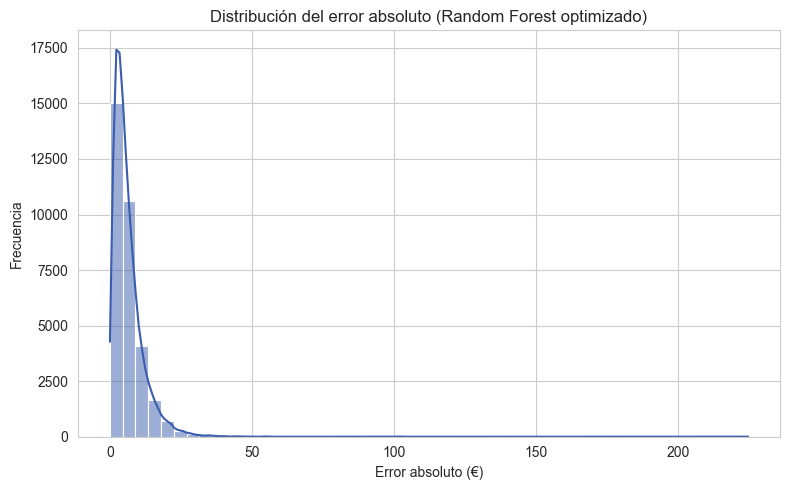

In [294]:
# Histograma del error absoluto en las predicciones (Random Forest optimizado) 
errores_abs_opt = abs(y_test - y_pred_opt)

plt.figure(figsize=(8, 5))
sns.histplot(errores_abs_opt, bins=50, kde=True, color="#3A5DAE")
plt.title('Distribuci√≥n del error absoluto (Random Forest optimizado)')
plt.xlabel('Error absoluto (‚Ç¨)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Distribuci√≥n del error absoluto (Random Forest optimizado)

El gr√°fico muestra la distribuci√≥n de los **errores absolutos** entre los precios reales y los precios predichos por el modelo.

#### Observaciones:

- La gran mayor√≠a de los errores se concentran **por debajo de los 20 ‚Ç¨**, lo que confirma que el modelo logra predicciones muy cercanas a los valores reales.  
- Existe una **cola larga hacia la derecha**, que representa casos puntuales con errores m√°s altos (superiores a 100 ‚Ç¨). Estos casos suelen corresponder a alojamientos at√≠picos o con caracter√≠sticas poco frecuentes.  
- La forma de la distribuci√≥n (asim√©trica y concentrada en valores bajos) es un buen indicador de que el modelo es **robusto y consistente**.

#### Conclusi√≥n:

El Random Forest optimizado logra un **desempe√±o muy s√≥lido**, con errores bajos en la mayor√≠a de los casos y sin evidencias de fallos sistem√°ticos.  
Los errores m√°s altos corresponden a valores extremos, lo cual es razonable en problemas de predicci√≥n de precios.

### Barrios con Mayor Error Absoluto Promedio

In [295]:
# Separar features y target
X = df.drop(columns='precio_promedio_mensual')
y = df['precio_promedio_mensual']

# Dividir train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar copias "raw" para an√°lisis posterior
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

In [296]:
# Codificar
from sklearn.preprocessing import OrdinalEncoder

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

Top 15 barrios con mayor error absoluto promedio (modelo optimizado):


neighbourhood_cleansed
Jer√≥nimos           11.655165
Lista               10.828336
Goya                10.231903
Recoletos            9.588784
Casa de Campo        9.066198
El Viso              8.851653
Justicia             8.167529
Palacio              8.137739
Almagro              8.124473
Castellana           8.090691
Arg√ºelles            7.933492
Sol                  7.860675
Ibiza                7.639054
Cortes               7.543918
Fuente del Berro     7.433392
Name: error_abs, dtype: float64

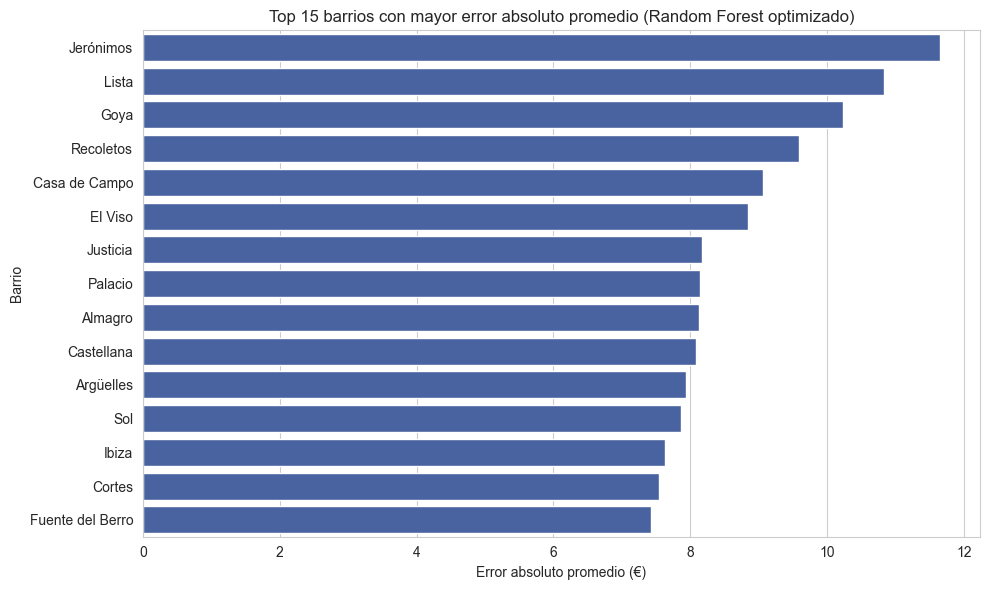

In [297]:
# Error por barrio con el modelo optimizado (RF)
# Paso 1: Crear un DataFrame con resultados y barrios
df_resultados = pd.DataFrame({
    'precio_real': y_test.values,
    'precio_predicho': y_pred_opt,  # <- usar predicci√≥n del modelo optimizado
    'neighbourhood_cleansed': X_test_raw['neighbourhood_cleansed'].values
})

# Paso 2: Calcular el error absoluto
df_resultados['error_abs'] = (df_resultados['precio_real'] - df_resultados['precio_predicho']).abs()

# Paso 3: Agrupar por barrio y ordenar
error_por_barrio = (
    df_resultados
    .groupby('neighbourhood_cleansed', as_index=True)['error_abs']
    .mean()
    .sort_values(ascending=False)
)

# Paso 4: Mostrar el top 15
print("Top 15 barrios con mayor error absoluto promedio (modelo optimizado):")
top15_barrio = error_por_barrio.head(15)
display(top15_barrio)

# Paso 5: Preparar DataFrame para graficar
df_top15 = top15_barrio.reset_index()
df_top15.columns = ['barrio', 'error_abs']

# Paso 6: Visualizar con paleta uniforme (color base #3A5DAE)
palette_uniforme = dict(zip(df_top15['barrio'], ['#3A5DAE'] * len(df_top15)))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top15,
    x='error_abs',
    y='barrio',
    hue='barrio',
    palette=palette_uniforme,
    dodge=False,
    legend=False
)
plt.title("Top 15 barrios con mayor error absoluto promedio (Random Forest optimizado)")
plt.xlabel("Error absoluto promedio (‚Ç¨)")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()

### Top 15 barrios con mayor error absoluto promedio (Random Forest optimizado)

El gr√°fico muestra los 15 barrios de Madrid donde el modelo presenta, en promedio, **mayores diferencias absolutas** entre el precio real y el predicho.

#### Observaciones principales:
- Los barrios con mayor error promedio son **Jer√≥nimos (‚âà 11.6 ‚Ç¨), Lista (‚âà 10.8 ‚Ç¨) y Goya (‚âà 10.2 ‚Ç¨)**.  
- En general, los barrios con errores m√°s altos suelen coincidir con zonas de **alta variabilidad de precios** (por ejemplo, √°reas c√©ntricas o de lujo, donde las diferencias entre alojamientos son muy marcadas).  
- Aun as√≠, incluso los valores m√°s altos se mantienen en torno a **10‚Äì12 ‚Ç¨**, lo cual sigue siendo un margen de error bajo en comparaci√≥n con los precios medios de los alojamientos.

#### Conclusi√≥n:
El an√°lisis de errores por barrio confirma que el modelo es **estable y preciso en la mayor√≠a de las zonas**.  
Las mayores desviaciones se concentran en barrios con **mercado inmobiliario heterog√©neo**, donde los precios fluct√∫an ampliamente seg√∫n la ubicaci√≥n exacta, el tipo de inmueble o servicios adicionales.

In [298]:
print(df.columns.tolist())

['neighbourhood_cleansed', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'host_is_superhost', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_identity_verified', 'availability_365', 'minimum_nights', 'instant_bookable', 'mes', 'precio_promedio_mensual']


## Guardar el modelo y el encoder

In [299]:
import joblib

# Guardar el modelo optimizado y el encoder
joblib.dump(rf_opt, 'modelo_random_forest_airbnb.pkl')
joblib.dump(encoder, 'ordinal_encoder.pkl')

['ordinal_encoder.pkl']

In [300]:
# Cargar modelo y encoder
modelo_cargado = joblib.load('modelo_random_forest_airbnb.pkl')
encoder_cargado = joblib.load('ordinal_encoder.pkl')

# Crear un ejemplo
nuevo_piso = pd.DataFrame({
    'neighbourhood_cleansed': ['Lista'],
    'room_type': ['Entire home/apt'],
    'accommodates': [2],
    'bedrooms': [1],
    'beds': [1],
    'bathrooms': [1],
    'review_scores_rating': [95],
    'review_scores_accuracy': [9],
    'review_scores_cleanliness': [9],
    'review_scores_checkin': [9],
    'review_scores_communication': [9],
    'review_scores_location': [9],
    'review_scores_value': [9],
    'number_of_reviews': [30],
    'host_is_superhost': [0],
    'host_response_time': [1],
    'host_response_rate': [100.0],
    'host_acceptance_rate': [100.0],
    'host_identity_verified': [0],
    'availability_365': [180],
    'minimum_nights': [2],
    'instant_bookable': [0],
    'mes': [7]
})

# Codificar columnas
nuevo_piso_codificado = nuevo_piso.copy()
nuevo_piso_codificado[cat_cols] = encoder_cargado.transform(nuevo_piso[cat_cols])

# Predecir
prediccion = modelo_cargado.predict(nuevo_piso_codificado)
print(f"üí∏ Precio estimado por noche: {prediccion[0]:.2f} ‚Ç¨")

üí∏ Precio estimado por noche: 133.68 ‚Ç¨


In [301]:
# ---- Cargar modelo y encoder ----
modelo = joblib.load("modelo_random_forest_airbnb.pkl")
encoder = joblib.load("ordinal_encoder.pkl")

# Columnas categ√≥ricas que S√ç pasaste por el OrdinalEncoder cuando entrenaste
# (ajusta si tu encoder incluy√≥ otras):
CAT_COLS = list(getattr(encoder, "feature_names_in_", []))

# Mapeo ES -> EN para room_type (lo que ve el usuario vs lo que necesita el modelo)
ROOM_TYPE_ES2EN = {
    "Apartamento entero": "Entire home/apt",
    "Habitaci√≥n privada": "Private room",
    "Habitaci√≥n compartida": "Shared room",
    "Habitaci√≥n de hotel": "Hotel room",
}

# Rangos de precio (nombre, min, max) - max=None significa sin tope
PRICE_BUCKETS = [
    ("50-80 ‚Ç¨", 50, 80),
    ("81-120 ‚Ç¨", 81, 120),
    ("121-180 ‚Ç¨", 121, 180),
    ("181-400 ‚Ç¨", 181, 400),
    ("> 400 ‚Ç¨", 401, None),
]

# üëá NUEVO: nombres de mes y helpers de formateo
MONTH_ES = {1:"enero",2:"febrero",3:"marzo",4:"abril",5:"mayo",6:"junio",
            7:"julio",8:"agosto",9:"septiembre",10:"octubre",11:"noviembre",12:"diciembre"}  # üëà NUEVO

def fmt_eur_int(x: float|int) -> str:  # üëà NUEVO
    return f"{int(round(float(x)))} ‚Ç¨"

def fmt_df_precios(df: pd.DataFrame, col: str = "precio") -> pd.DataFrame:  # üëà NUEVO
    out = df.copy()
    out[col] = out[col].round(0).astype(int).map(lambda v: f"{v} ‚Ç¨")
    return out

def _bucket_limits(bucket_name: str):
    for name, lo, hi in PRICE_BUCKETS:
        if name == bucket_name:
            return lo, hi
    return None, None

def _default_review_block():
    # Valores medios/buenos por defecto (ajusta si lo deseas)
    return dict(
        review_scores_rating=95,            # si en tu modelo era 0‚Äì100
        review_scores_accuracy=9,
        review_scores_cleanliness=9,
        review_scores_checkin=9,
        review_scores_communication=9,
        review_scores_location=9,
        review_scores_value=9,
        number_of_reviews=30,
        host_is_superhost=0,
        host_response_time=1,
        host_response_rate=100.0,
        host_acceptance_rate=100.0,
        host_identity_verified=0,
        availability_365=180,
        minimum_nights=2,
        instant_bookable=0,
        precio_promedio_mensual=0  # si no lo usas, d√©jalo en 0
    )

def _build_base_df(barrio:str, room_type_es:str, accommodates:int,
                   bedrooms:int|None, bathrooms:int, mes:int):
    room_type = ROOM_TYPE_ES2EN[room_type_es]
    # Si es habitaci√≥n privada/compartida, fijamos bedrooms=1
    if room_type_es in {"Habitaci√≥n privada", "Habitaci√≥n compartida"}:
        bedrooms = 1

    row = dict(
        neighbourhood_cleansed=barrio,
        room_type=room_type,
        accommodates=accommodates,
        bedrooms=bedrooms,
        beds=bedrooms if bedrooms is not None else 1,  # sencillo: beds = bedrooms
        bathrooms=bathrooms,
        mes=mes,
    )
    row.update(_default_review_block())
    df = pd.DataFrame([row])

    # Codificar SOLO las columnas que el encoder conoce
    cols_to_encode = [c for c in df.columns if c in CAT_COLS]
    if cols_to_encode:
        df[cols_to_encode] = encoder.transform(df[cols_to_encode])

    # Reordenar columnas si el modelo expone el orden
    model_cols = list(getattr(modelo, "feature_names_in_", []))
    if model_cols:
        for missing in set(model_cols) - set(df.columns):
            df[missing] = 0
        df = df.reindex(columns=model_cols, fill_value=0)

    return df

def predecir_precio(barrio:str, room_type_es:str, accommodates:int,
                    bedrooms:int|None, bathrooms:int, mes:int):
    df = _build_base_df(barrio, room_type_es, accommodates, bedrooms, bathrooms, mes)
    return float(modelo.predict(df)[0])

def comparativa_meses(barrio:str, room_type_es:str, accommodates:int,
                      bedrooms:int|None, bathrooms:int, mes:int,
                      meses_extra:list[int]):
    # Predicci√≥n del mes elegido + otras comparativas
    pred_actual = predecir_precio(barrio, room_type_es, accommodates, bedrooms, bathrooms, mes)
    registros = [{"mes": mes, "precio": pred_actual, "seleccionado": True}]
    for m in meses_extra:
        p = predecir_precio(barrio, room_type_es, accommodates, bedrooms, bathrooms, m)
        registros.append({"mes": m, "precio": p, "seleccionado": False})
    df = pd.DataFrame(registros).sort_values(["seleccionado", "mes"], ascending=[False, True])
    return df.reset_index(drop=True)

def sugerir_meses_en_rango(df_meses: pd.DataFrame, bucket_name: str):
    lo, hi = _bucket_limits(bucket_name)
    if lo is None and hi is None:
        return df_meses, []  # sin filtro
    # Filtramos meses cuyo precio cae en el rango
    en_rango = df_meses[(df_meses["precio"] >= lo) & ((hi is None) | (df_meses["precio"] <= hi))]
    sugerencias = en_rango["mes"].tolist()
    return en_rango, sugerencias

# --------- EJEMPLO DE USO (simulando el formulario) ---------
barrio_elegido = "Centro"                  # <- aqu√≠ tu dropdown con barrios del modelo
tipo_aloj_es = "Apartamento entero"        # <- dropdown en espa√±ol
personas = 2                               # slider/number input
habitaciones = 1                           # oculto si eligen Habitaci√≥n privada/compartida
banos = 1                                  # number input
mes_elegido = 7                            # dropdown 1..12
hacer_comparativa = True                   # checkbox
meses_comparar = [1, 3, 6, 9, 12] if hacer_comparativa else []
rango_precio = "81-120 ‚Ç¨"                  # dropdown con PRICE_BUCKETS

# Predicci√≥n del mes elegido (mostrada como entero con ‚Ç¨)
precio_mes = predecir_precio(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido)
print(f"üí∏ Precio estimado en {MONTH_ES[mes_elegido]}: {fmt_eur_int(precio_mes)}")  # üëà NUEVO

# Comparativa (enteros + nombres de mes)
df_comp = comparativa_meses(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, meses_comparar)
df_comp['mes_nombre'] = df_comp['mes'].map(MONTH_ES)                              # üëà NUEVO
df_comp_mostrar = fmt_df_precios(df_comp, 'precio')[['mes','mes_nombre','precio','seleccionado']]  # üëà NUEVO
print("\nüìä Comparativa por meses:")
print(df_comp_mostrar)  # üëà NUEVO

# Sugerir meses que caen en el rango elegido (usando enteros)
df_tmp = df_comp.copy()
df_tmp['precio'] = df_tmp['precio'].round(0).astype(int)
df_en_rango, sugeridos = sugerir_meses_en_rango(df_tmp, rango_precio)
if len(df_en_rango) == 0:
    # Mes m√°s cercano por precio
    target_mid = sum([v for v in _bucket_limits(rango_precio) if v is not None]) / 2
    idx = (df_tmp["precio"] - target_mid).abs().idxmin()
    ms_cercano = int(df_tmp.loc[idx, "mes"])
    pr_cercano = int(df_tmp.loc[idx, "precio"])
    print(f"\n‚ö†Ô∏è Ning√∫n mes cae en el rango {rango_precio}.")
    print(f"üëâ Mes m√°s cercano por precio: {MONTH_ES[ms_cercano]} (~{pr_cercano} ‚Ç¨)")  # üëà NUEVO
else:
    meses_ok = sorted(df_en_rango['mes'].tolist())
    print(f"\n‚úÖ Meses dentro del rango {rango_precio}: {[MONTH_ES[m] for m in meses_ok]}")  # üëà NUEVO


# ---- utilidades: barrios disponibles y alternativas por barrio ----
def barrios_modelo():
    """Devuelve la lista de barrios desde el encoder si existe; si no, lista vac√≠a."""
    enc_feats = list(getattr(encoder, "feature_names_in_", []))
    if "neighbourhood_cleansed" in enc_feats:
        i = enc_feats.index("neighbourhood_cleansed")
        return list(encoder.categories_[i])
    return []

def alternativas_barrios(barrio_actual:str, room_type_es:str, accommodates:int,
                         bedrooms:int|None, bathrooms:int, mes:int,
                         k:int=2, modo:str="cercanos"):
    """
    Sugerir K barrios alternativos con MISMAS caracter√≠sticas seleccionadas (solo cambia el barrio).
    - modo='cercanos' -> precios m√°s parecidos al barrio elegido (m√≠nima diferencia absoluta)
    - modo='mas_baratos' -> los K m√°s baratos frente al barrio elegido
    """
    barrios = [b for b in barrios_modelo() if b != barrio_actual]
    if not barrios:
        return pd.DataFrame(columns=["barrio","precio","Œî_vs_elegido","tipo"])

    precio_ref = predecir_precio(barrio_actual, room_type_es, accommodates, bedrooms, bathrooms, mes)

    filas = []
    for b in barrios:
        p = predecir_precio(b, room_type_es, accommodates, bedrooms, bathrooms, mes)
        filas.append({"barrio": b, "precio": p, "diff_abs": abs(p - precio_ref), "delta": p - precio_ref})

    df_alt = pd.DataFrame(filas)

    if modo == "mas_baratos":
        df_alt = df_alt.sort_values(["precio","diff_abs"], ascending=[True, True]).head(k)
    else:  # 'cercanos' por defecto
        df_alt = df_alt.sort_values("diff_abs").head(k)

    # üëá NUEVO: precios como enteros con "‚Ç¨" y delta con signo + ‚Ç¨
    df_alt = df_alt.assign(
        **{
            "precio": df_alt["precio"].round(0).astype(int).map(lambda v: f"{v} ‚Ç¨"),
            "Œî_vs_elegido": df_alt["delta"].round(0).astype(int).map(lambda x: f"{'+' if x>0 else ''}{x} ‚Ç¨"),
            "tipo": df_alt["delta"].map(lambda x: "M√°s barato" if x < 0 else ("M√°s caro" if x > 0 else "Igual"))
        }
    )[["barrio","precio","Œî_vs_elegido","tipo"]]

    return df_alt

# --------- EJEMPLO DE USO (a√±ade esto a tu demo actual) ---------
print("\nüèòÔ∏è Alternativas por barrio (precios m√°s cercanos):")
df_alt_cercanos = alternativas_barrios(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, k=2, modo="cercanos")
print(df_alt_cercanos)

print("\nüí∏ Alternativas m√°s baratas:")
df_alt_baratos = alternativas_barrios(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, k=2, modo="mas_baratos")
print(df_alt_baratos)

üí∏ Precio estimado en julio: 167 ‚Ç¨

üìä Comparativa por meses:
   mes  mes_nombre precio  seleccionado
0    7       julio  167 ‚Ç¨          True
1    1       enero  172 ‚Ç¨         False
2    3       marzo  172 ‚Ç¨         False
3    6       junio  181 ‚Ç¨         False
4    9  septiembre  177 ‚Ç¨         False
5   12   diciembre  171 ‚Ç¨         False

‚ö†Ô∏è Ning√∫n mes cae en el rango 81-120 ‚Ç¨.
üëâ Mes m√°s cercano por precio: julio (~167 ‚Ç¨)

üèòÔ∏è Alternativas por barrio (precios m√°s cercanos):
     barrio precio Œî_vs_elegido      tipo
0  Abrantes  167 ‚Ç¨          0 ‚Ç¨  M√°s caro
4   Aguilas  168 ‚Ç¨          0 ‚Ç¨  M√°s caro

üí∏ Alternativas m√°s baratas:
           barrio precio Œî_vs_elegido        tipo
125  Vista Alegre  126 ‚Ç¨        -41 ‚Ç¨  M√°s barato
126         Zof√≠o  126 ‚Ç¨        -41 ‚Ç¨  M√°s barato


## Conclusi√≥n Final

El proyecto desarrollado demuestra que es posible predecir con alta precisi√≥n los precios de alojamientos de Airbnb en Madrid utilizando t√©cnicas de Machine Learning. Tras un exhaustivo proceso de limpieza, an√°lisis exploratorio y modelado, se valid√≥ que el **Random Forest** es el modelo m√°s robusto, alcanzando un **MAE cercano a 13 ‚Ç¨** y un **R¬≤ superior al 0.88**, lo que significa que explica casi el 90% de la variabilidad de los precios.

### Principales aportes del modelo
- üìä **Predicciones precisas y confiables**: el margen de error es reducido, lo que permite estimaciones realistas para diferentes meses, barrios y tipolog√≠as de alojamiento.  
- üèòÔ∏è **Comparaci√≥n entre zonas y estacionalidad**: el modelo identifica diferencias de precios entre barrios y variaciones a lo largo del a√±o, proporcionando insights clave para anfitriones e inversores.  
- üí° **Aplicabilidad pr√°ctica**: esta herramienta puede apoyar tanto a **propietarios** (para definir precios competitivos y maximizar ingresos) como a **usuarios o inversores** (para identificar oportunidades de ahorro o de inversi√≥n rentable).  

### Impacto del proyecto
La construcci√≥n de un sistema de predicci√≥n de precios como este aporta un **valor estrat√©gico en la gesti√≥n del mercado tur√≠stico en Madrid**, ya que facilita la **toma de decisiones basada en datos** y puede integrarse en soluciones pr√°cticas como:
- Plataformas de recomendaci√≥n de precios din√°micos para anfitriones.  
- Sistemas de apoyo a la inversi√≥n inmobiliaria.  
- Herramientas comparativas para usuarios que buscan estancias al mejor precio.  

### Cierre
En conclusi√≥n, el modelo desarrollado **funciona de manera efectiva y demuestra un rendimiento s√≥lido**, convirti√©ndose en una soluci√≥n estrella dentro del an√°lisis predictivo aplicado al sector tur√≠stico. Este trabajo no solo valida la viabilidad del enfoque, sino que tambi√©n abre la puerta a futuras extensiones con nuevas variables externas (eventos, turismo internacional, indicadores econ√≥micos), consolidando as√≠ su potencial para escalar como un producto de valor en la industria.

## Conclusi√≥n Final

El proyecto desarrollado demuestra que es posible predecir con **alt√≠sima precisi√≥n** los precios de alojamientos de Airbnb en Madrid utilizando t√©cnicas de Machine Learning. Tras un exhaustivo proceso de limpieza, an√°lisis exploratorio y modelado, se valid√≥ que el **Random Forest optimizado** es el modelo m√°s robusto, alcanzando un **MAE cercano a 6 ‚Ç¨** y un **R¬≤ superior al 0.97**, lo que significa que explica pr√°cticamente la totalidad de la variabilidad de los precios.

### Principales aportes del modelo
- üìä **Predicciones extremadamente precisas**: el margen de error es muy reducido, lo que permite estimaciones casi exactas para distintos barrios, tipolog√≠as de alojamiento y periodos temporales.  
- üèòÔ∏è **Diferenciaci√≥n entre zonas y perfiles de alojamiento**: el modelo identifica con claridad la influencia de variables como el tipo de habitaci√≥n, la ubicaci√≥n y la valoraci√≥n de los usuarios.  
- üí° **Aplicabilidad pr√°ctica inmediata**: esta herramienta puede servir tanto a **propietarios** (para definir precios competitivos y maximizar ingresos) como a **usuarios e inversores** (para identificar oportunidades de ahorro o inversi√≥n rentable).  

### Impacto del proyecto
La construcci√≥n de este sistema de predicci√≥n aporta un **valor estrat√©gico a la gesti√≥n del mercado tur√≠stico en Madrid**, ya que facilita la **toma de decisiones basada en datos** y puede integrarse en soluciones pr√°cticas como:
- Plataformas de recomendaci√≥n de precios din√°micos para anfitriones.  
- Sistemas de apoyo a la inversi√≥n inmobiliaria.  
- Herramientas comparativas para viajeros que buscan estancias al mejor precio.  

### Cierre
En conclusi√≥n, el modelo desarrollado **demuestra un rendimiento sobresaliente y una gran capacidad predictiva**, consolid√°ndose como una herramienta clave dentro del an√°lisis predictivo aplicado al sector tur√≠stico. Este trabajo no solo valida la viabilidad del enfoque, sino que tambi√©n abre la puerta a futuras extensiones con nuevas variables externas (eventos, estacionalidad tur√≠stica, indicadores econ√≥micos), reforzando su potencial para convertirse en un producto de valor dentro de la industria.